In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
df=pd.read_csv('M&M.csv')

In [2]:
df.drop(df[df['Series']!='EQ'].index,axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,M&amp;M,EQ,15-May-2017,1367.85,1373.0,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27
1,M&amp;M,EQ,16-May-2017,1375.65,1377.0,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82
2,M&amp;M,EQ,17-May-2017,1366.35,1363.0,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89
3,M&amp;M,EQ,18-May-2017,1378.80,1369.0,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70
4,M&amp;M,EQ,19-May-2017,1352.85,1350.0,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  494 non-null    object 
 1   Series                  494 non-null    object 
 2   Date                    494 non-null    object 
 3   Prev Close              494 non-null    float64
 4   Open Price              494 non-null    float64
 5   High Price              494 non-null    float64
 6   Low Price               494 non-null    float64
 7   Last Price              494 non-null    float64
 8   Close Price             494 non-null    float64
 9   Average Price           494 non-null    float64
 10  Total Traded Quantity   494 non-null    int64  
 11  Turnover                494 non-null    float64
 12  No. of Trades           494 non-null    int64  
 13  Deliverable Qty         494 non-null    int64  
 14  % Dly Qt to Traded Qty  494 non-null    fl

In [5]:
df.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

convert to datetime

In [6]:
df['Date']=pd.to_datetime(df['Date'])
s=df['Date'].max()-df['Date'].min()

In [7]:
max_price=df['Close Price'][len(df['Close Price']) - 90 :].max()
min_price=df['Close Price'][len(df['Close Price']) - 90 :].min()
avg_price=df['Close Price'][len(df['Close Price']) - 90 :].mean()
print('The Minimum Price for the Mahindra in last 90 days is:% 3.2f\n'
      'The Maximum Price for the Mahindra in last 90 days is:% 3.2f\n' 
      'The Average Price for the Mahindra in last 90 days is:% 3.2f'
      %(max_price,min_price,avg_price))

The Minimum Price for the Mahindra in last 90 days is: 803.85
The Maximum Price for the Mahindra in last 90 days is: 617.60
The Average Price for the Mahindra in last 90 days is: 676.82


vwap

In [8]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['pvpro']=df['Close Price']*df['Total Traded Quantity']
s=df.groupby(['Year','Month'])[['pvpro']].sum()
s['s']=df.groupby(['Year','Month'])[['Total Traded Quantity']].sum()
s['ans']=s['pvpro']/s['s']
array=s['ans'].to_numpy(dtype ='float32')

last n days avg price and perc change

In [9]:
def Nday_avg_price(N = 1):
    return df['Average Price'][len(df) - N:].mean()
def profit_loss_perc(N = 1):
    return (df['Close Price'][len(df)-1] - df['Close Price'][N])/df['Close Price'][N]*100
print('The Average Price over last 1 Week is: %3.2f ' %(Nday_avg_price(7)))
print("The Average Price over last 2 Weeks is: %3.2f "  %(Nday_avg_price(14)))
print("The Average Price over last 1 Month is: %3.2f "  %(Nday_avg_price(30)))
print("The Average Price over last 6 Months is: %3.2f " %(Nday_avg_price(30*6)))
print("The Average Price over last year is: %3.2f "  %(Nday_avg_price(365)))
print('The Profit/Loss percentage over last 1 Week is: %3.2f ' %(profit_loss_perc(7)))
print("The Profit/Loss percentage over last 2 Weeks is: %3.2f "  %(profit_loss_perc(14)))
print("The Profit/Loss percentage over last 1 Month is: %3.2f "  %(profit_loss_perc(30)))
print("The Profit/Loss percentage over last 6 Months is: %3.2f " %(profit_loss_perc(30*6)))
print("The Profit/Loss percentage over last year is: %3.2f "  %(profit_loss_perc(365)))

The Average Price over last 1 Week is: 631.74 
The Average Price over last 2 Weeks is: 646.58 
The Average Price over last 1 Month is: 658.78 
The Average Price over last 6 Months is: 751.24 
The Average Price over last year is: 827.79 
The Profit/Loss percentage over last 1 Week is: -52.81 
The Profit/Loss percentage over last 2 Weeks is: -56.46 
The Profit/Loss percentage over last 1 Month is: -54.93 
The Profit/Loss percentage over last 6 Months is: -19.06 
The Profit/Loss percentage over last year is: -18.31 


In [10]:
df['Day_Perc_Change']=df['Close Price'].pct_change()
df['Day_Perc_Change'].fillna(value=0,inplace=True)

defining trend based on pct change

In [11]:
d=[]
for i in df['Day_Perc_Change']:
    if i>-0.5 and i<0.5:
        d.append('Slight or No change')
    elif i>0.5 and i<1:
        d.append('Slight positive')
    elif i>-1 and i<-0.5:
        d.append('Slight negative')
    elif i>1 and i<3:
        d.append('Positive')
    elif i>-3 and i<-1:
        d.append('Negative')
    elif i>3 and i<7:
        d.append('Among top gainers')
    elif i>-7 and i<-3:
        d.append('Among top losers')
    elif i<-7:
        d.append('Bear drop')
    elif i>7:
        d.append('Bull run')
df['Trend']=d

In [12]:
f=df.groupby('Trend')['Total Traded Quantity'].mean()
u=df.groupby('Trend')['Total Traded Quantity'].median()

data visualisation

In [13]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,pvpro,Day_Perc_Change,Trend
0,M&amp;M,EQ,2017-05-15,1367.85,1373.0,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,2017,5,7.678741e+08,0.000000,Slight or No change
1,M&amp;M,EQ,2017-05-16,1375.65,1377.0,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,2017,5,7.050530e+08,-0.006760,Slight or No change
2,M&amp;M,EQ,2017-05-17,1366.35,1363.0,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,2017,5,1.269715e+09,0.009112,Slight or No change
3,M&amp;M,EQ,2017-05-18,1378.80,1369.0,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,2017,5,1.647563e+09,-0.018821,Slight or No change
4,M&amp;M,EQ,2017-05-19,1352.85,1350.0,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,2017,5,1.302388e+09,-0.014377,Slight or No change


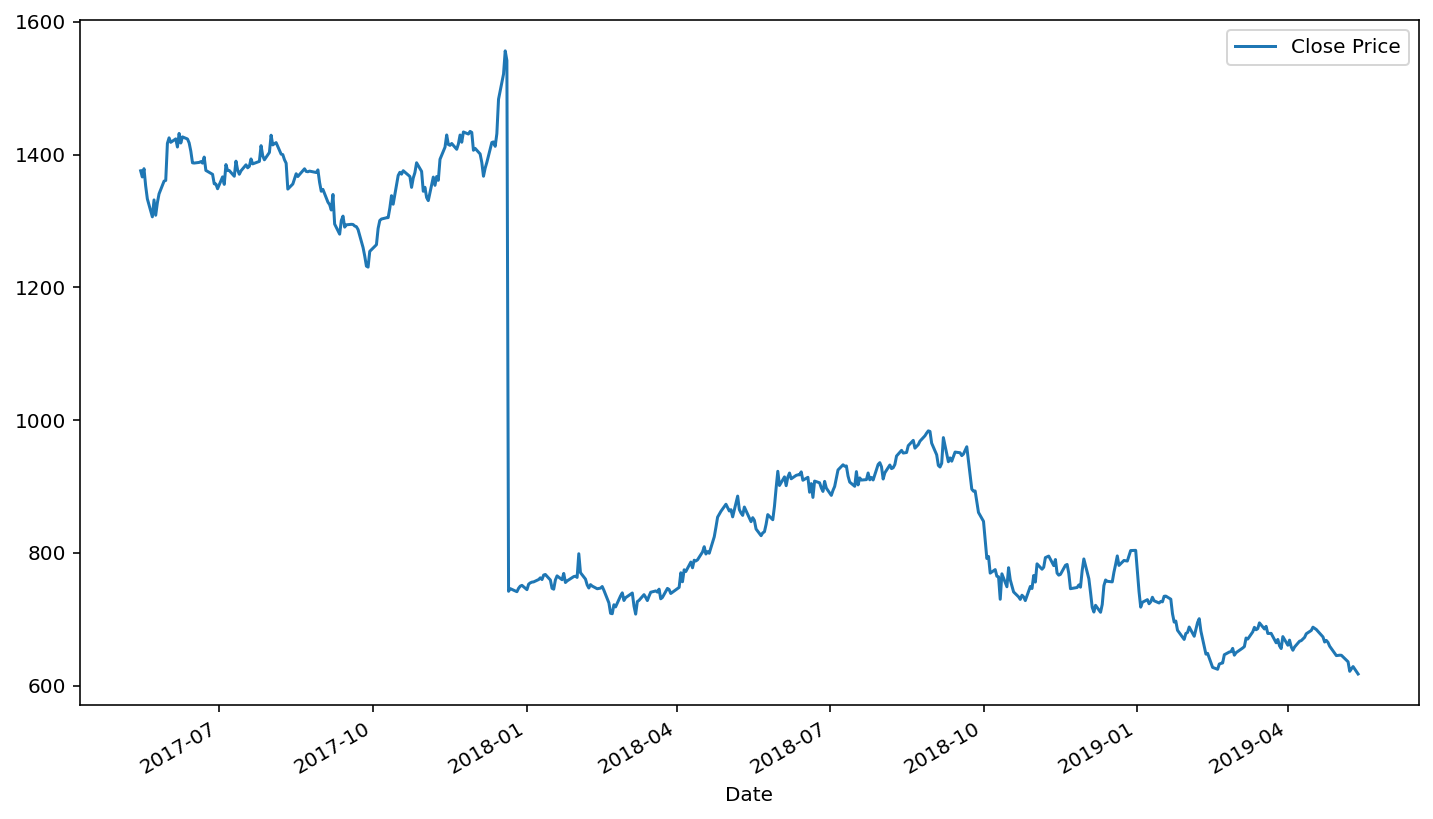

In [14]:
df.reset_index().plot(x='Date',y='Close Price')
#drastic changes is found in 2017 december 2018 september

In [15]:
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,pvpro,Day_Perc_Change,Trend
0,M&amp;M,EQ,2017-05-15,1367.85,1373.0,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,2017,5,7.678741e+08,0.000000,Slight or No change
1,M&amp;M,EQ,2017-05-16,1375.65,1377.0,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,2017,5,7.050530e+08,-0.006760,Slight or No change
2,M&amp;M,EQ,2017-05-17,1366.35,1363.0,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,2017,5,1.269715e+09,0.009112,Slight or No change
3,M&amp;M,EQ,2017-05-18,1378.80,1369.0,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,2017,5,1.647563e+09,-0.018821,Slight or No change
4,M&amp;M,EQ,2017-05-19,1352.85,1350.0,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,2017,5,1.302388e+09,-0.014377,Slight or No change


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


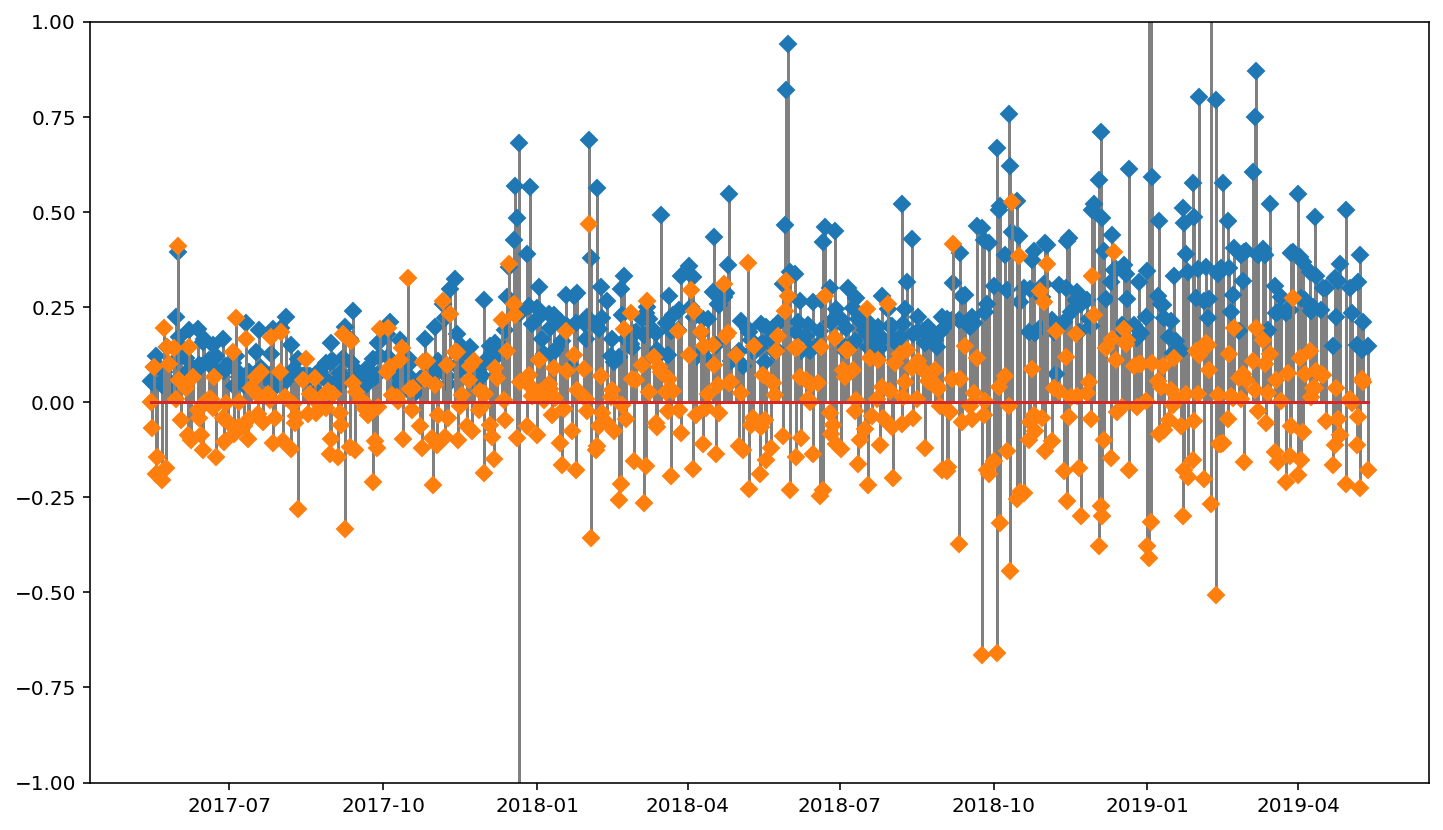

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,pvpro,Day_Perc_Change,Trend
0,M&amp;M,EQ,2017-05-15,1367.85,1373.00,1386.65,1370.0,1374.80,1375.65,1378.31,558190,7.693579e+08,38442,386664,69.27,2017,5,7.678741e+08,0.000000,Slight or No change
1,M&amp;M,EQ,2017-05-16,1375.65,1377.00,1380.50,1363.1,1364.15,1366.35,1371.22,516012,7.075634e+08,29075,334469,64.82,2017,5,7.050530e+08,-0.006760,Slight or No change
2,M&amp;M,EQ,2017-05-17,1366.35,1363.00,1384.35,1360.4,1379.00,1378.80,1378.56,920884,1.269497e+09,32299,689649,74.89,2017,5,1.269715e+09,0.009112,Slight or No change
3,M&amp;M,EQ,2017-05-18,1378.80,1369.00,1372.00,1347.5,1347.50,1352.85,1361.70,1217846,1.658344e+09,20476,1043736,85.70,2017,5,1.647563e+09,-0.018821,Slight or No change
4,M&amp;M,EQ,2017-05-19,1352.85,1350.00,1357.60,1328.5,1338.20,1333.40,1344.80,976742,1.313522e+09,36297,773590,79.20,2017,5,1.302388e+09,-0.014377,Slight or No change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,M&amp;M,EQ,2019-05-07,638.50,641.75,642.90,634.2,635.55,636.00,637.64,3160875,2.015496e+09,72445,2366596,74.87,2019,5,2.010316e+09,-0.003915,Slight or No change
490,M&amp;M,EQ,2019-05-08,636.00,635.55,637.00,619.0,624.60,621.65,631.73,3853705,2.434492e+09,51461,3092701,80.25,2019,5,2.395656e+09,-0.022563,Slight or No change
491,M&amp;M,EQ,2019-05-09,621.65,620.90,627.95,616.1,625.80,625.45,621.74,1366143,8.493796e+08,52412,538598,39.42,2019,5,8.544541e+08,0.006113,Slight or No change
492,M&amp;M,EQ,2019-05-10,625.45,626.25,631.85,619.0,625.85,628.75,624.59,2093110,1.307326e+09,55778,1074491,51.33,2019,5,1.316043e+09,0.005276,Slight or No change


In [16]:

plt.figure()
df['Day']=df['Total Traded Quantity']/10000000
df['Day_Perc']=df['Day_Perc_Change']*10

plt.ylim(-1,1)
#plt.plot(df['Date'],df['Day'])
plt.stem(df.Date,df.Day,linefmt='grey', markerfmt='D')
#plt.plot(df['Date'],df['Day_Perc_Change'])
plt.stem(df.Date,df.Day_Perc,linefmt='grey', markerfmt='D')
plt.show()
df.drop(['Day','Day_Perc'],axis=1)

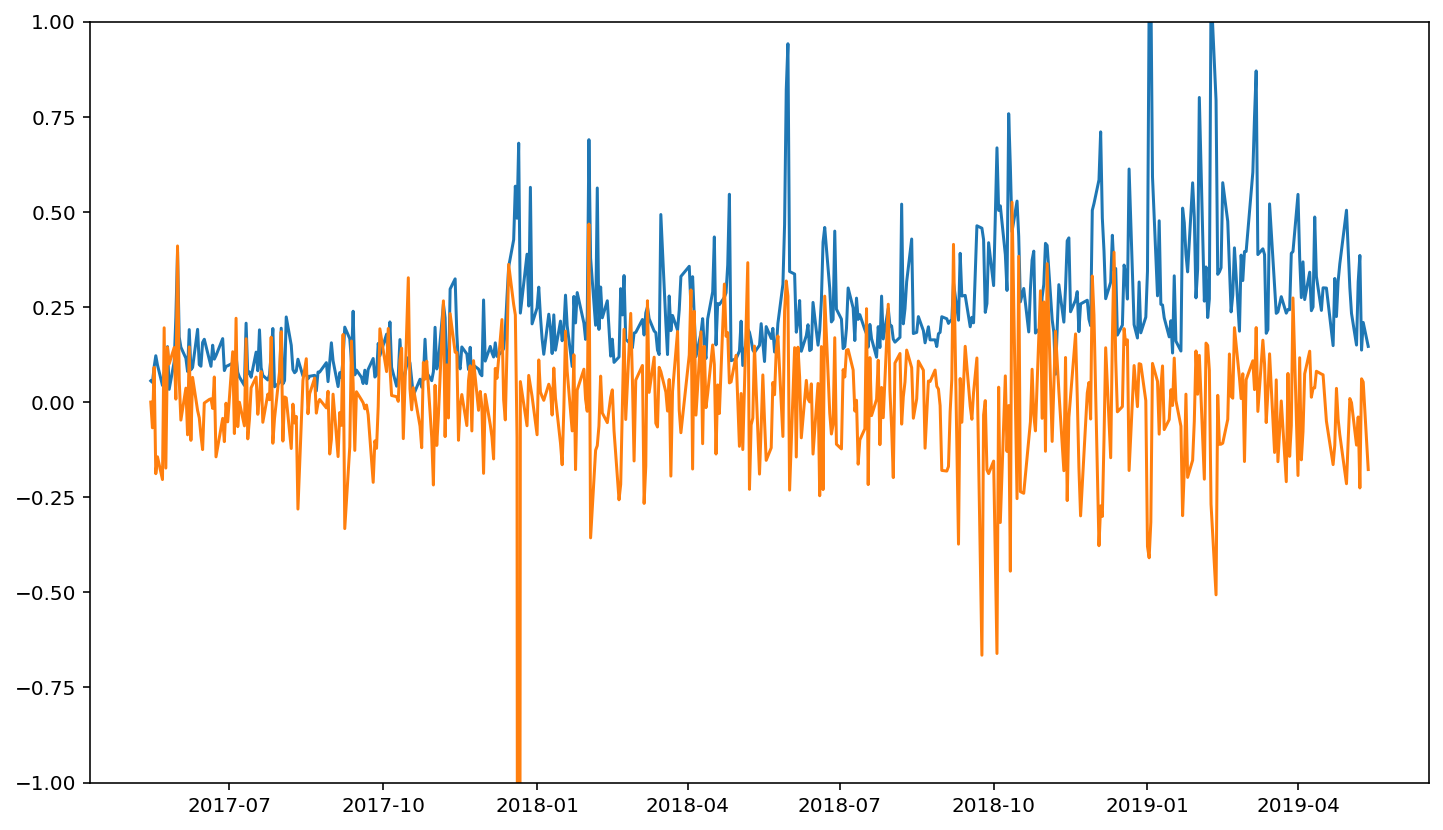

In [17]:
plt.figure()
df['Day']=df['Total Traded Quantity']/10000000
df['Day_Perc']=df['Day_Perc_Change']*10

plt.ylim(-1,1)
plt.plot(df['Date'],df['Day'])
#plt.stem(df.Date,df.Day,linefmt='grey', markerfmt='D')
plt.plot(df['Date'],df['Day_Perc'])
#plt.stem(df.Date,df.Day_Perc,linefmt='grey', markerfmt='D')
plt.show()

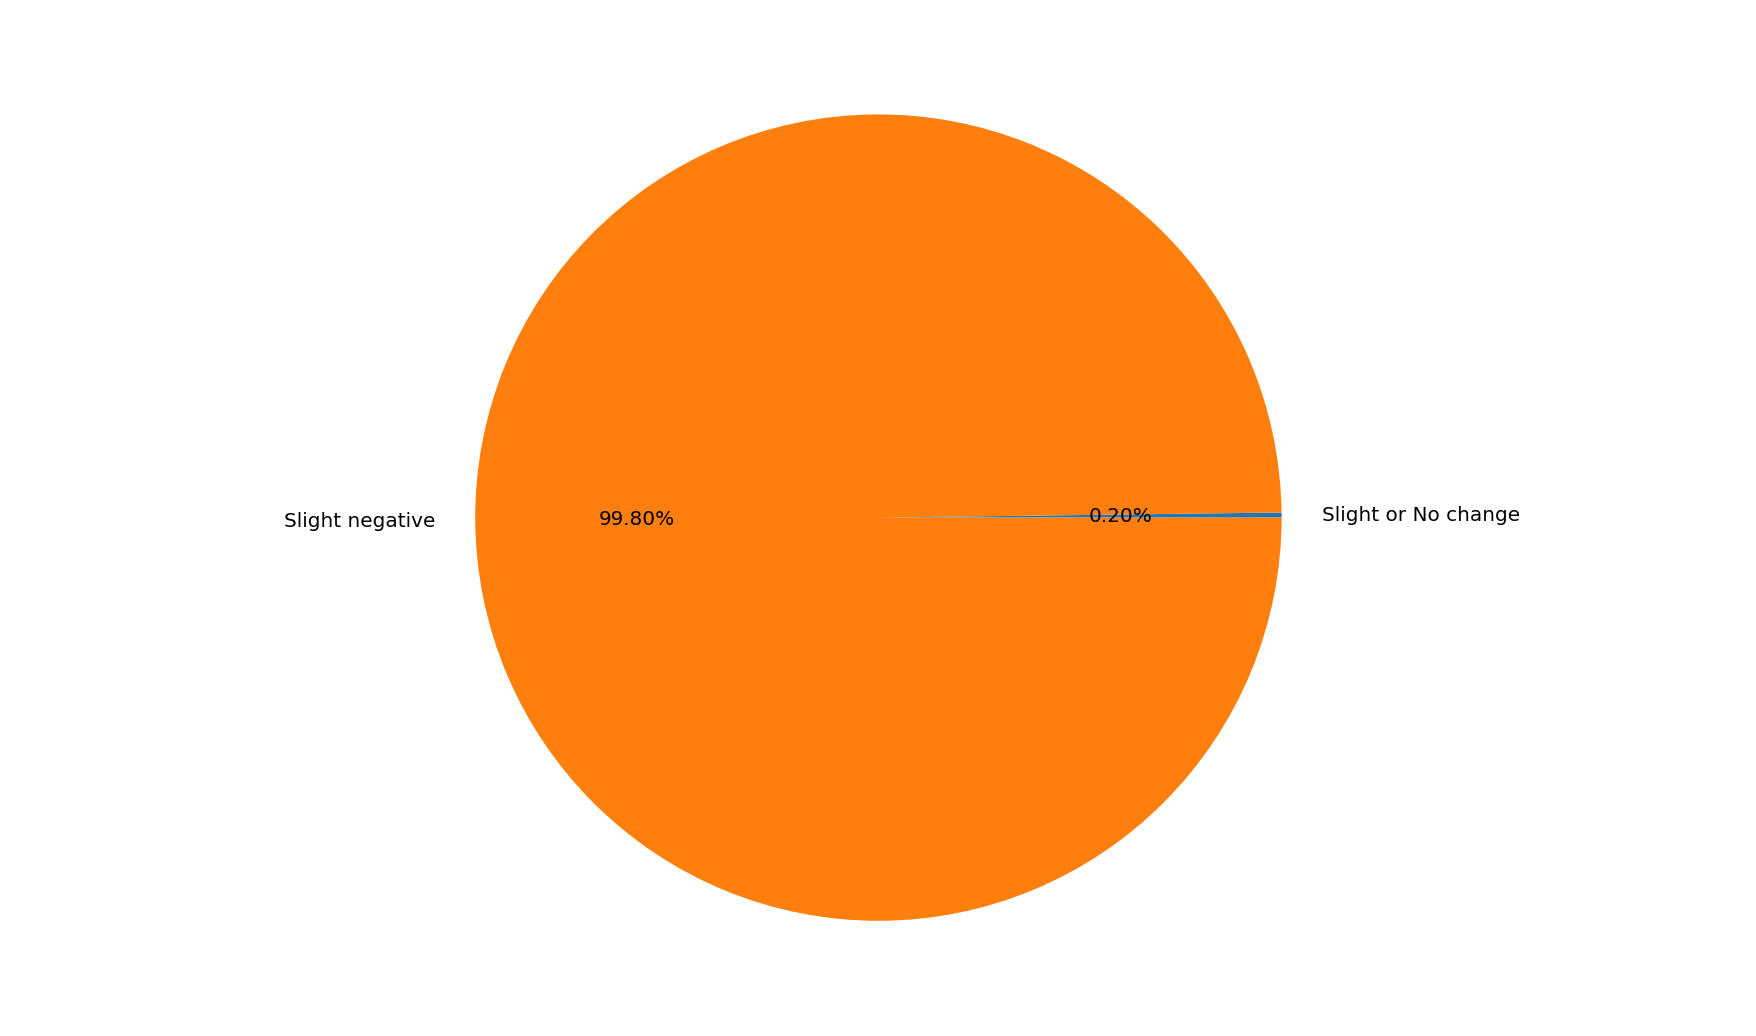

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
s=list(df['Trend'].unique())
count = list(df.groupby('Trend')['Date'].count())
ax.pie(count, labels =s,autopct='%1.2f%%')
plt.show()

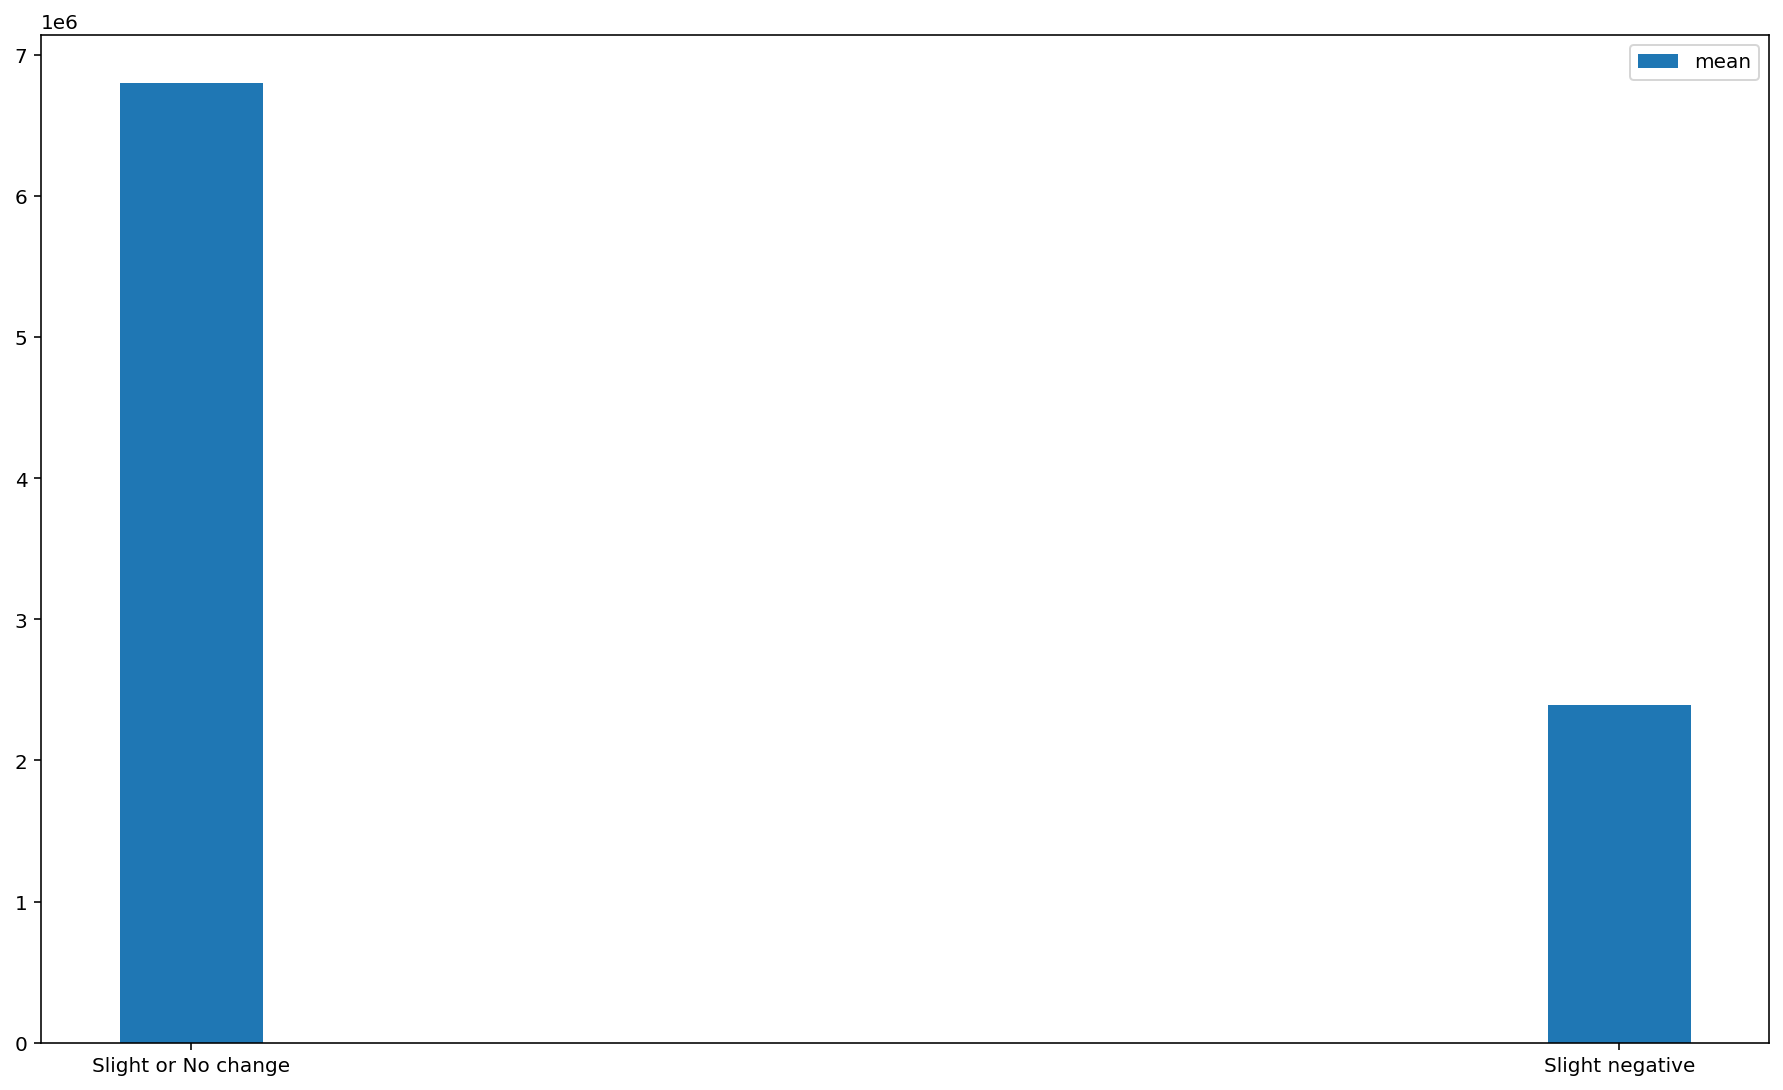

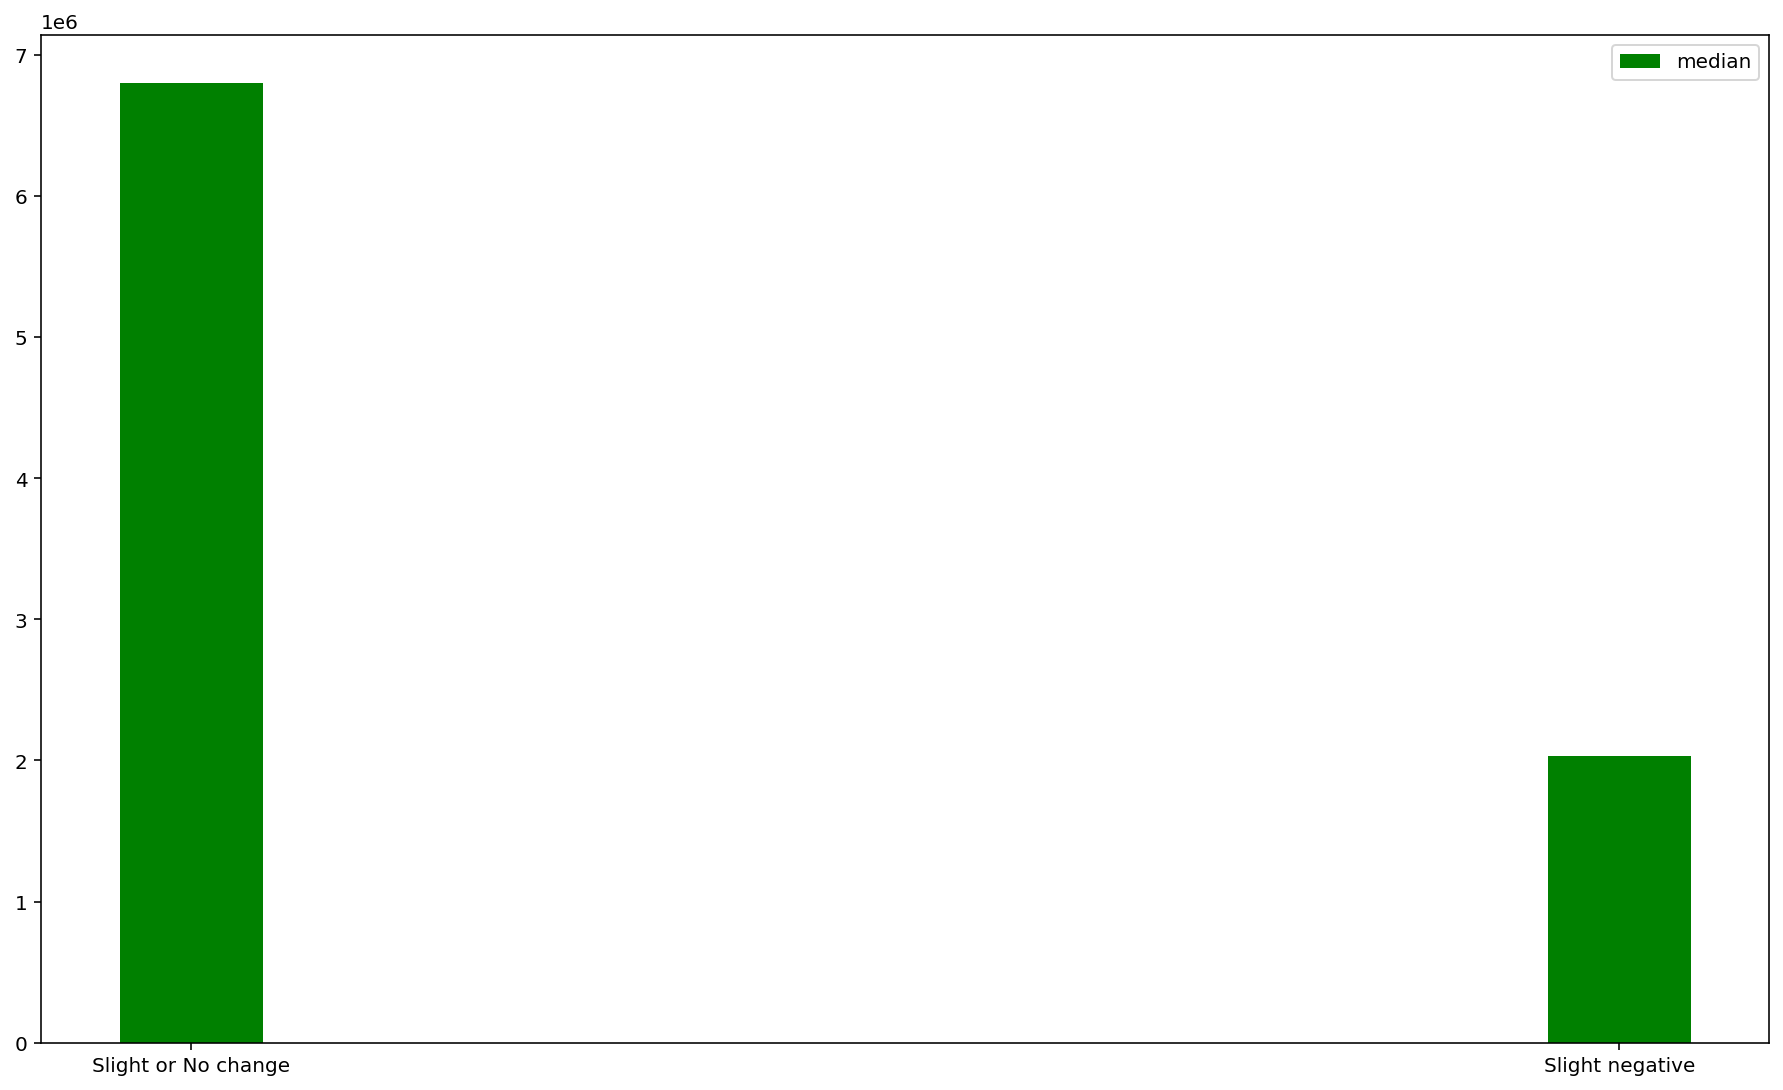

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
s=list(df['Trend'].unique())
count = list(df.groupby('Trend')['Total Traded Quantity'].mean())
ax.bar(s,count,0.1)
ax.legend(labels=['mean'])
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
s=list(df['Trend'].unique())
count = list(df.groupby('Trend')['Total Traded Quantity'].median())
ax.bar(s,count,0.1,color = 'g')
ax.legend(labels=['median'])
plt.show()

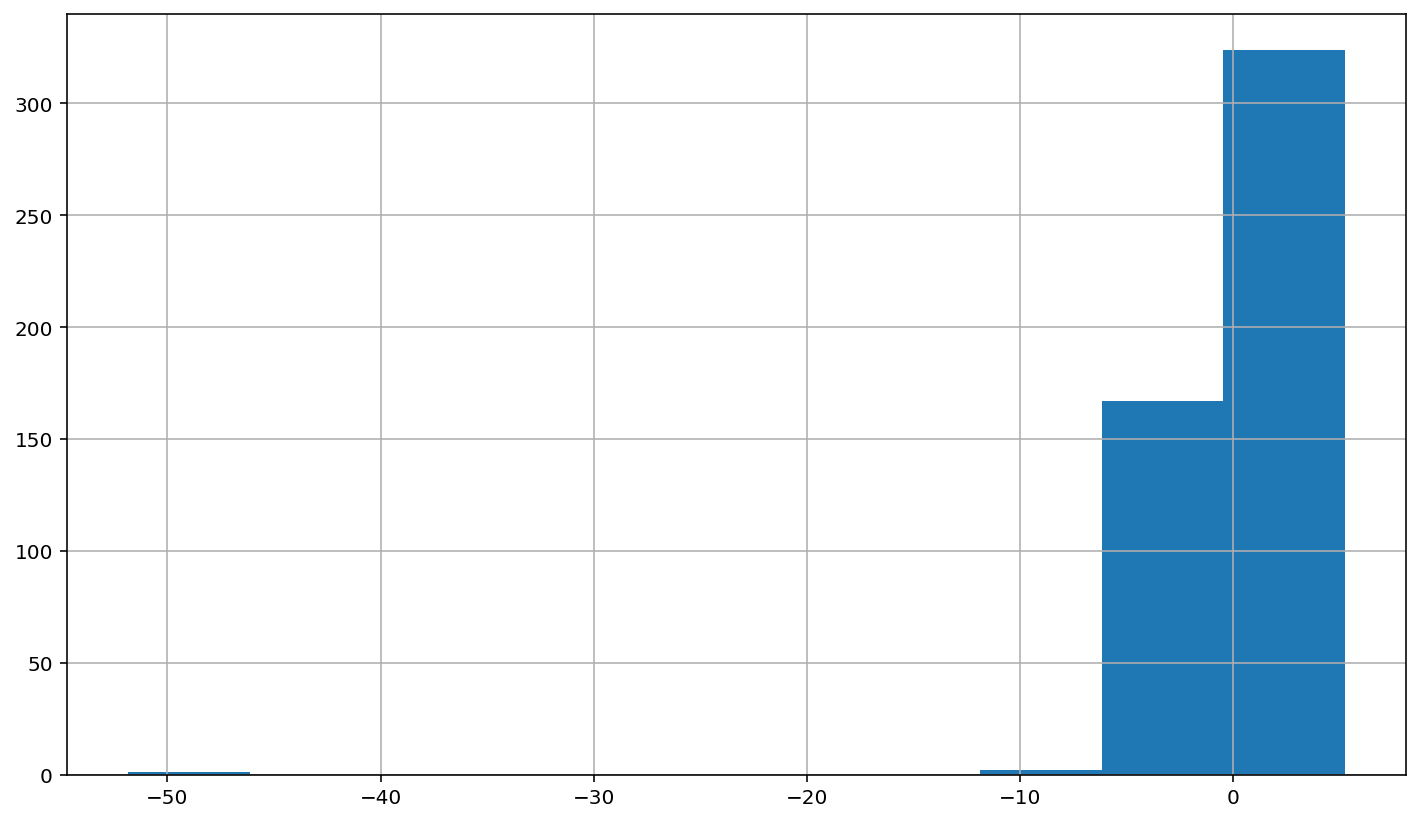

In [20]:
df['Daily Return']=df['Day_Perc_Change']*100
df['Daily Return'].hist(bins=10)

In [21]:
d1=pd.read_csv('Small_Cap/RCOM.csv')
d1['Date']=d1['Date'].astype('datetime64')
d1.set_index(d1['Date'],inplace=True)
d1=d1[d1['Series']=='EQ']
d2=pd.read_csv('Small_Cap/PVR.csv')
d2['Date']=d2['Date'].astype('datetime64')
d2.set_index(d2['Date'],inplace=True)
d2=d2[d2['Series']=='EQ']
d3=pd.read_csv('Small_Cap/ITDC.csv')
d3['Date']=d3['Date'].astype('datetime64')
d3.set_index(d3['Date'],inplace=True)
d3=d3[d3['Series']=='EQ']
d4=pd.read_csv('Small_Cap/NCC.csv')
d4['Date']=d4['Date'].astype('datetime64')
d4.set_index(d4['Date'],inplace=True)
d4=d4[d4['Series']=='EQ']

d5=pd.read_csv('Small_Cap/IDFC.csv')
d5['Date']=d5['Date'].astype('datetime64')
d5.set_index(d5['Date'],inplace=True)
d5=d5[d5['Series']=='EQ']
close_price = pd.DataFrame({'RCOM':d1['Close Price'],'PVR':d2['Close Price'],
                               'ITDC':d3['Close Price'],'NCC':d4['Close Price'],'IDFC':d5['Close Price']})
perc=close_price.pct_change()*100
perc.dropna(inplace=True)
perc

,RCOM,PVR,ITDC,NCC,IDFC
Date,,,,,
2017-05-16,0.312500,0.921342,-2.068753,3.133025,0.863422
2017-05-17,-0.467290,-0.565302,-1.562745,1.045817,-1.400778
2017-05-18,-2.816901,-0.996537,-3.526127,-4.386397,-2.920284
2017-05-19,-1.610306,-0.099007,-1.711734,-1.597938,-0.569106
2017-05-22,-2.454992,-2.150573,-3.306411,-0.209534,-1.553557
...,...,...,...,...,...
2019-05-07,5.000000,-1.231759,-3.947120,-1.120598,-1.721854
2019-05-08,4.761905,-1.775181,-0.924105,1.025364,1.347709
2019-05-09,4.545455,0.569059,-2.262354,-2.297009,0.000000


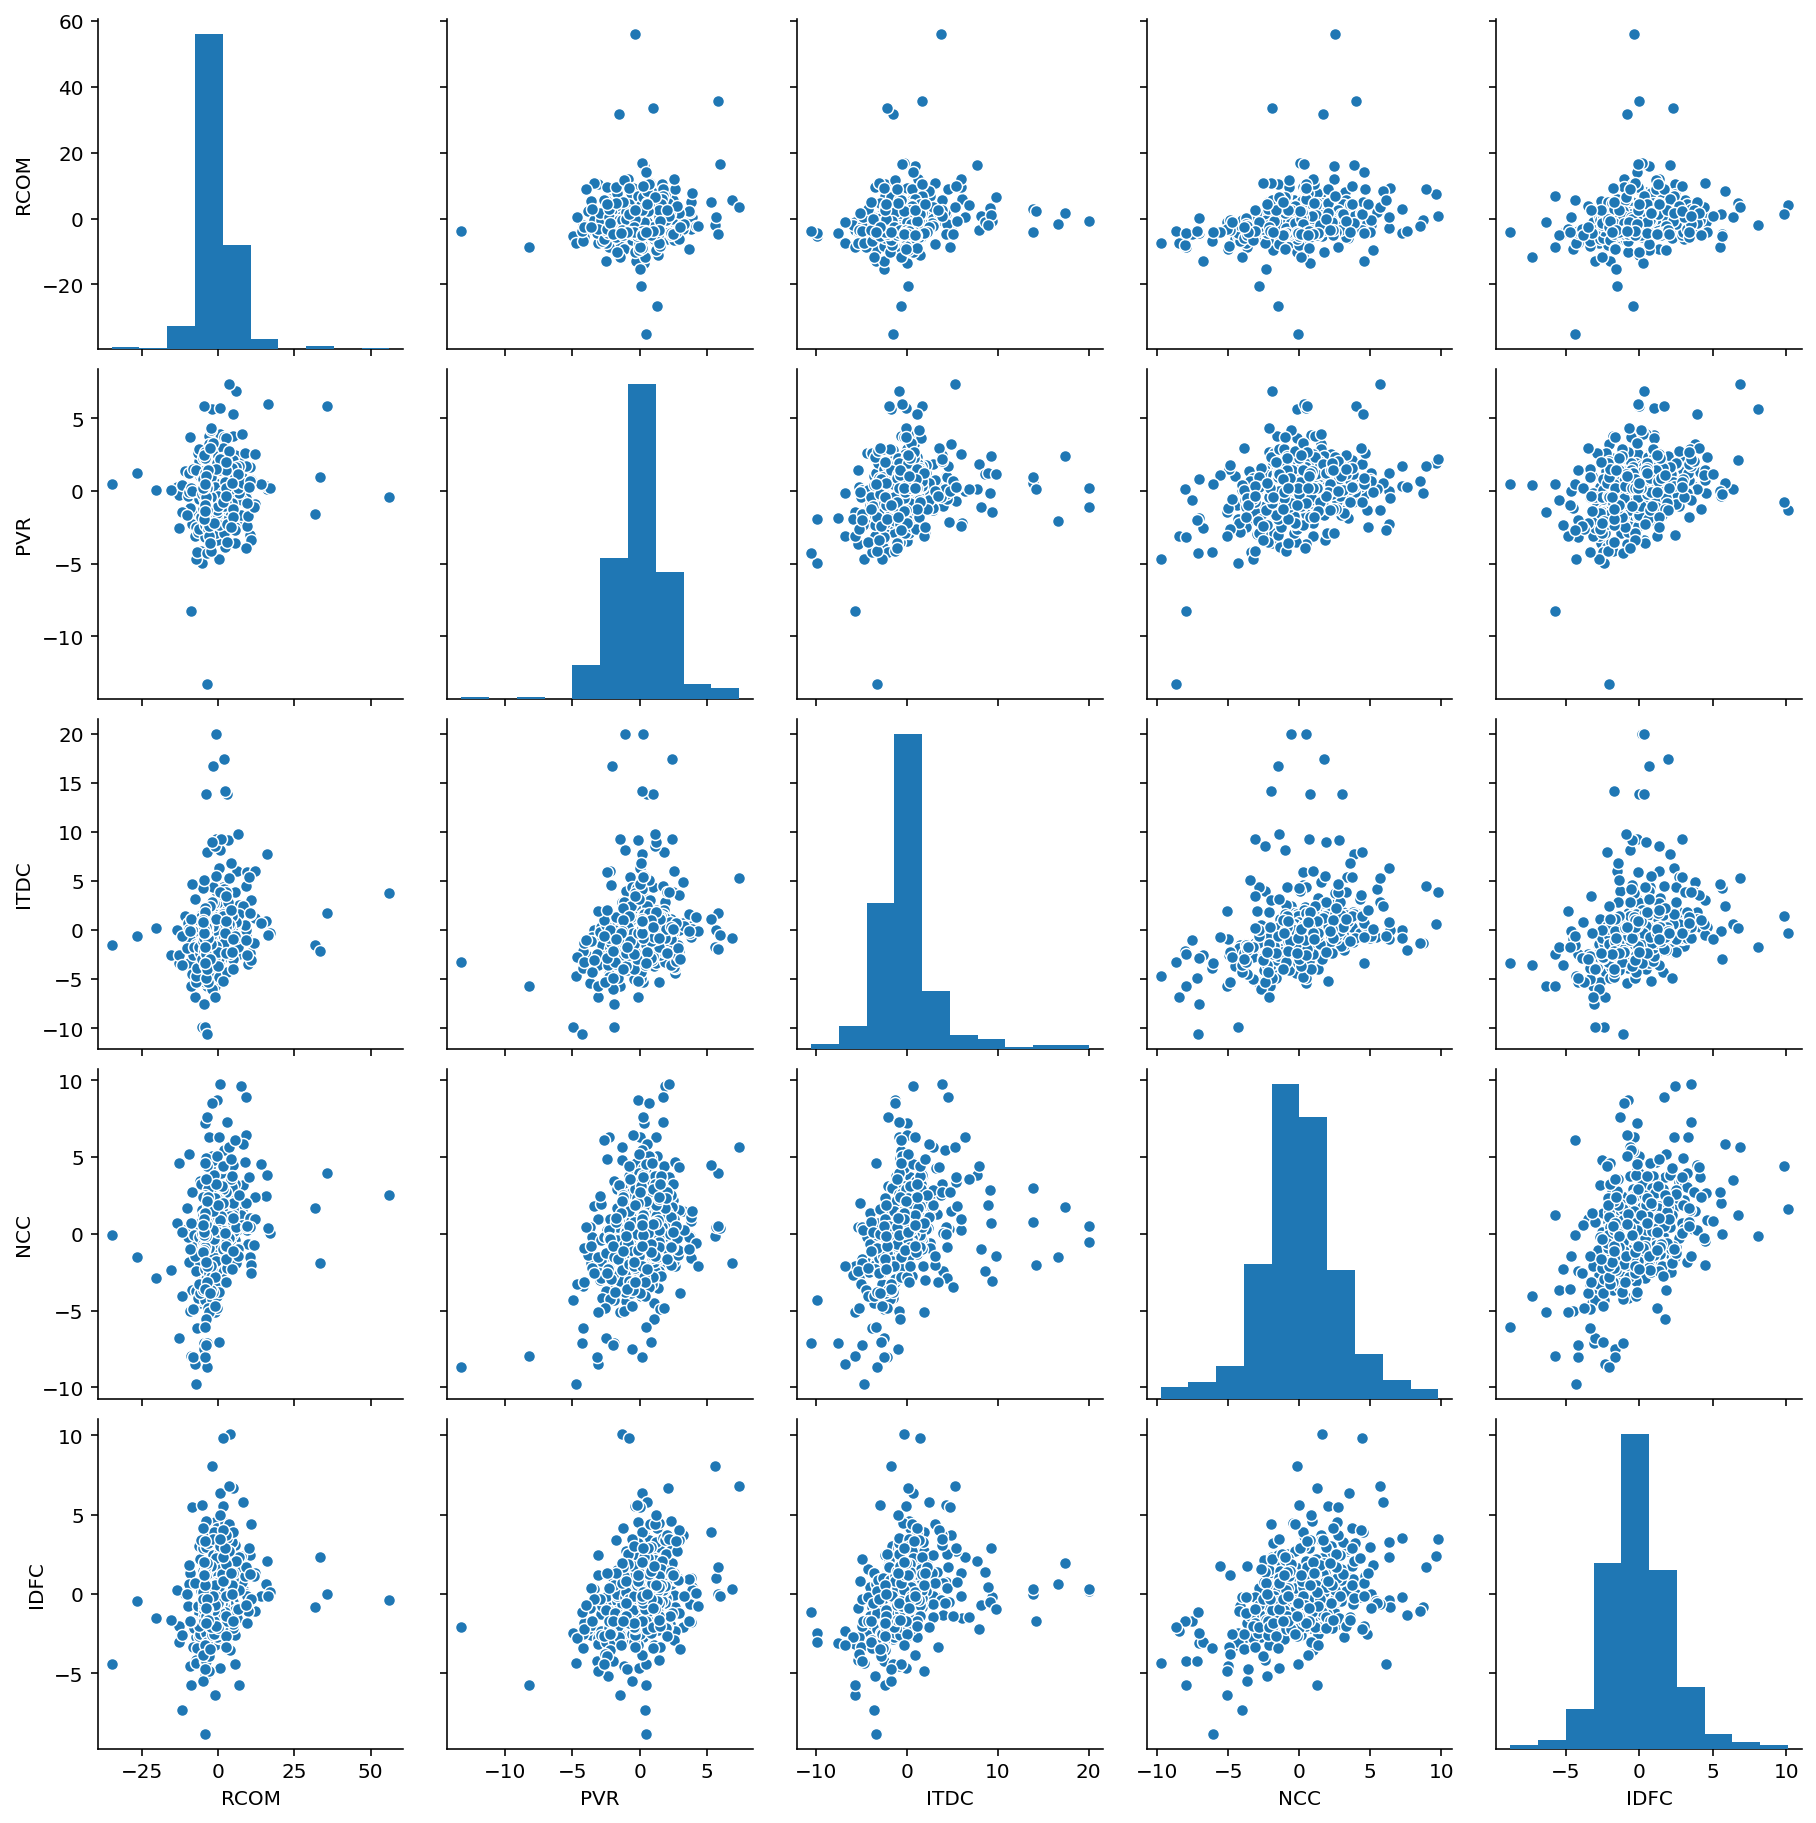

In [22]:
sns.pairplot(perc)

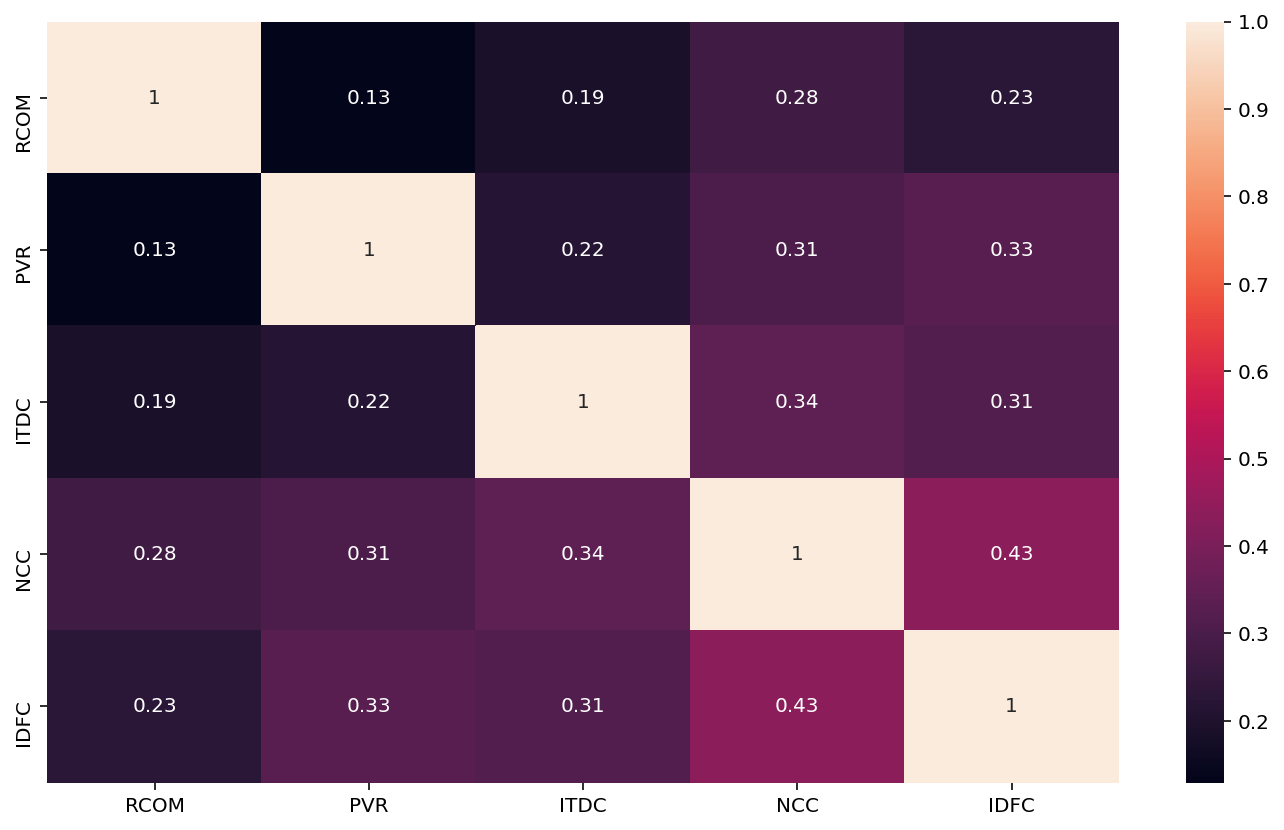

In [23]:
corr=perc.corr()
sns.heatmap(corr,annot=True)

Text(0, 0.5, 'Change')

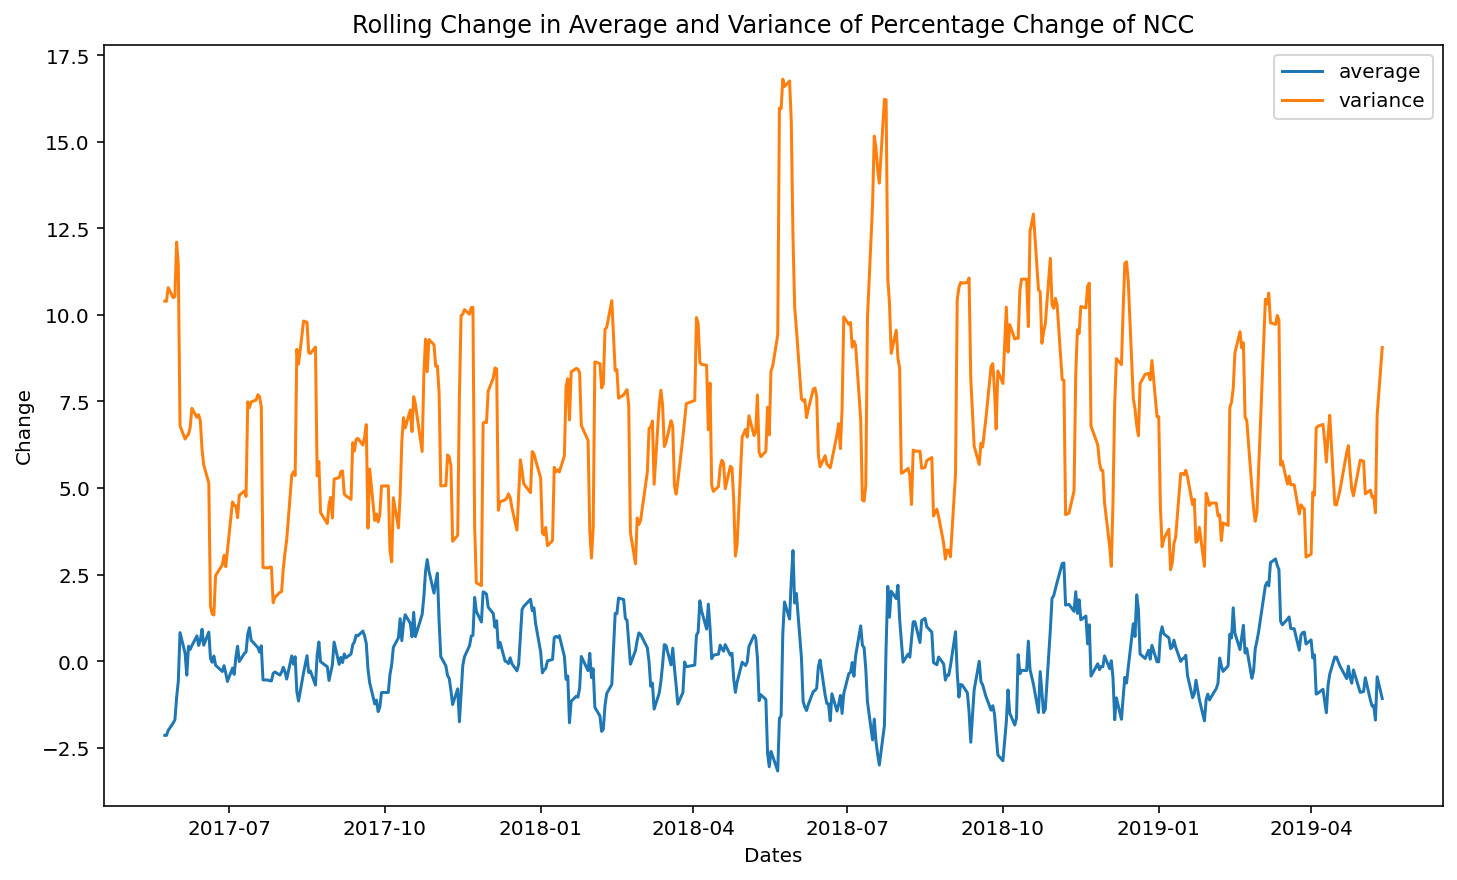

In [24]:
import numpy as np
df=perc['NCC'].rolling(7).mean()
s=perc['NCC'].rolling(7).std()*np.sqrt(7)
plt.plot(df,label='average')

plt.plot(s,label='variance')
plt.legend()
plt.xlabel('Dates')
plt.title("Rolling Change in Average and Variance of Percentage Change of NCC")
plt.ylabel("Change")

Text(0, 0.5, 'Change')

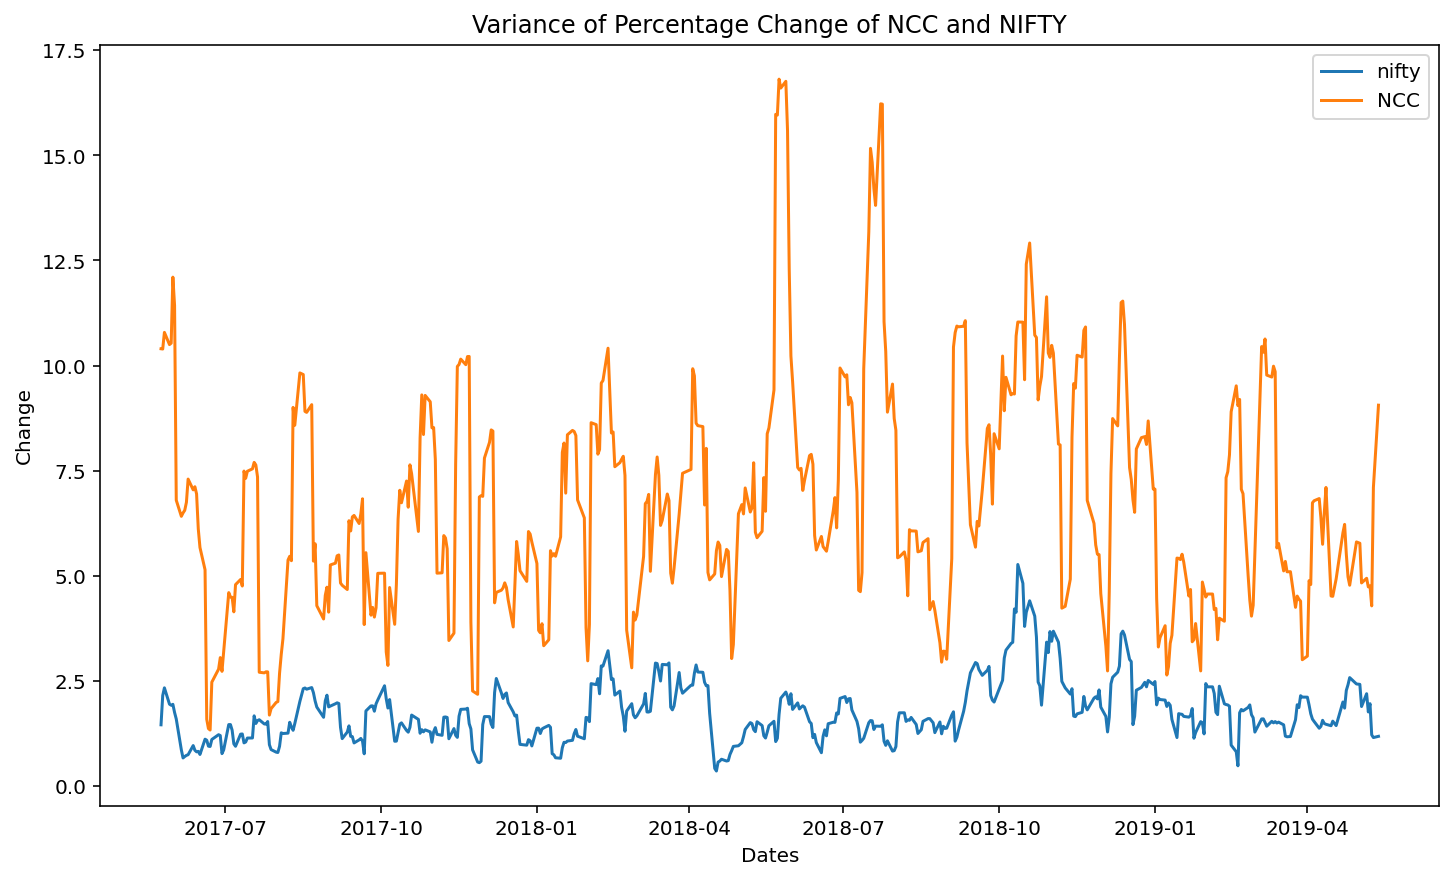

In [25]:
nift=pd.read_csv('Nifty50/Nifty50.csv')
nift['Date']=nift['Date'].astype('datetime64')
nift.set_index(nift['Date'],inplace=True)
nifty=nift['Close'].pct_change()*100
nifty.dropna(inplace=True)

n=nifty.rolling(7).std()*np.sqrt(7)
plt.plot(n,label='nifty')
plt.plot(s,label='NCC')
plt.legend()
plt.xlabel('Dates')
plt.title("Variance of Percentage Change of NCC and NIFTY")
plt.ylabel("Change")

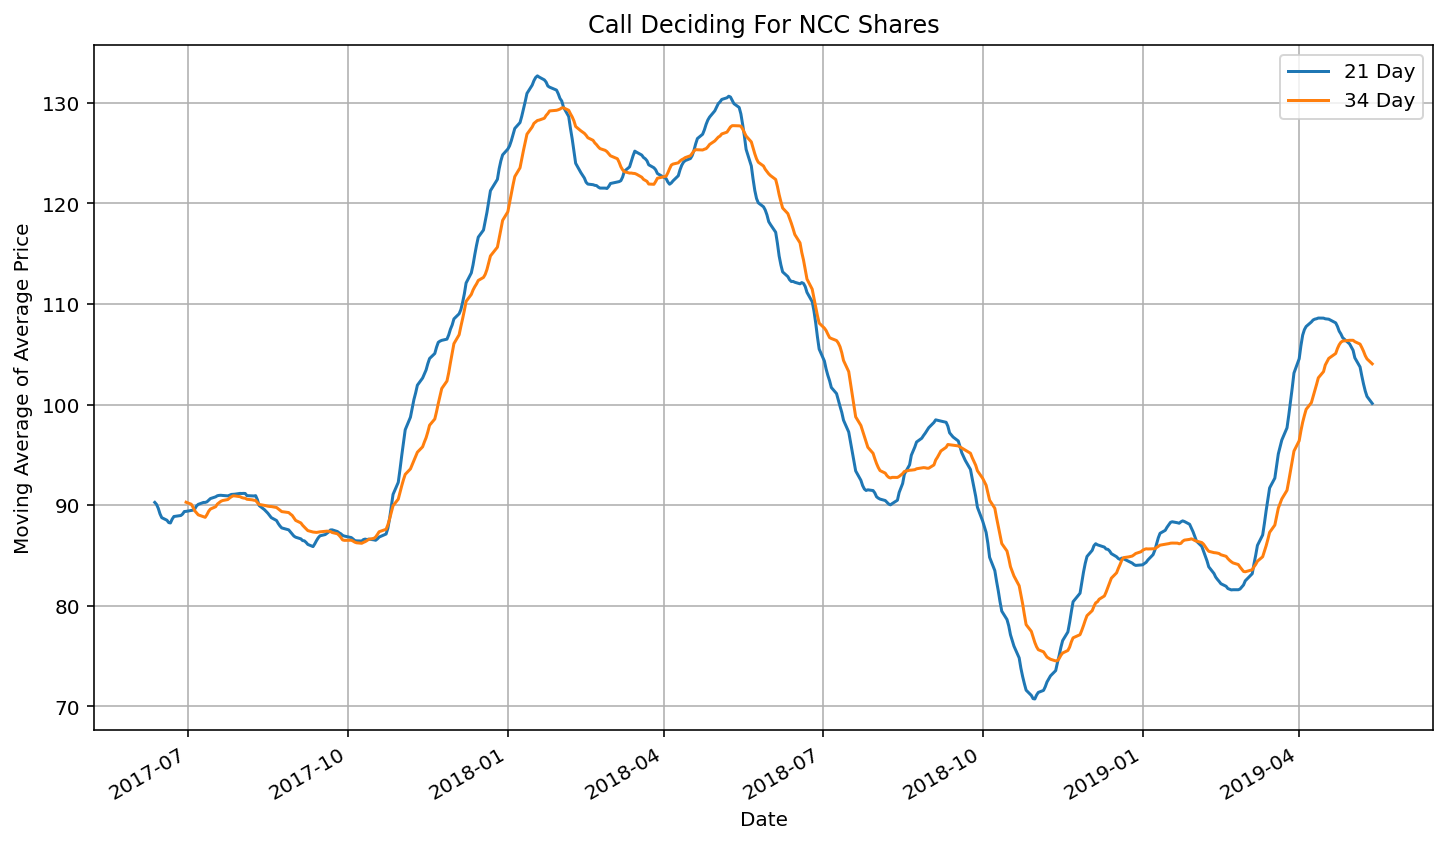

In [26]:
Day21_avg = d4['Average Price'].rolling(21).mean()
Day34_avg = d4['Average Price'].rolling(34).mean()
Day21_avg.dropna(inplace=True)
Day34_avg.dropna(inplace=True)

plt.figure()
Day21_avg.plot(label = "21 Day")
Day34_avg.plot(label = "34 Day")
plt.ylabel("Moving Average of Average Price")
plt.title("Call Deciding For NCC Shares")
plt.grid(True)
plt.legend()
plt.show()

In [27]:
Day21_avg=Day21_avg[13:]
c=[]
d=[]
if(Day21_avg[0]<Day34_avg[0]):
    x=0
else:
    x=1
for i in range(1,len(Day21_avg)):
    if(Day21_avg[i]<Day34_avg[i]):
        g=0
        if(x!=g):
            x=0
            c.append(Day21_avg.index[i])
    else:
        g=1
        if(x!=g):
            x=1
            d.append(Day21_avg.index[i])   
print(c)
print(d)

[Timestamp('2017-08-11 00:00:00'), Timestamp('2017-10-16 00:00:00'), Timestamp('2018-02-05 00:00:00'), Timestamp('2018-04-02 00:00:00'), Timestamp('2018-05-17 00:00:00'), Timestamp('2018-09-19 00:00:00'), Timestamp('2018-12-21 00:00:00'), Timestamp('2019-02-01 00:00:00'), Timestamp('2019-04-30 00:00:00')]
[Timestamp('2017-07-05 00:00:00'), Timestamp('2017-09-21 00:00:00'), Timestamp('2017-10-25 00:00:00'), Timestamp('2018-03-09 00:00:00'), Timestamp('2018-04-18 00:00:00'), Timestamp('2018-08-20 00:00:00'), Timestamp('2018-11-14 00:00:00'), Timestamp('2019-01-09 00:00:00'), Timestamp('2019-03-06 00:00:00')]


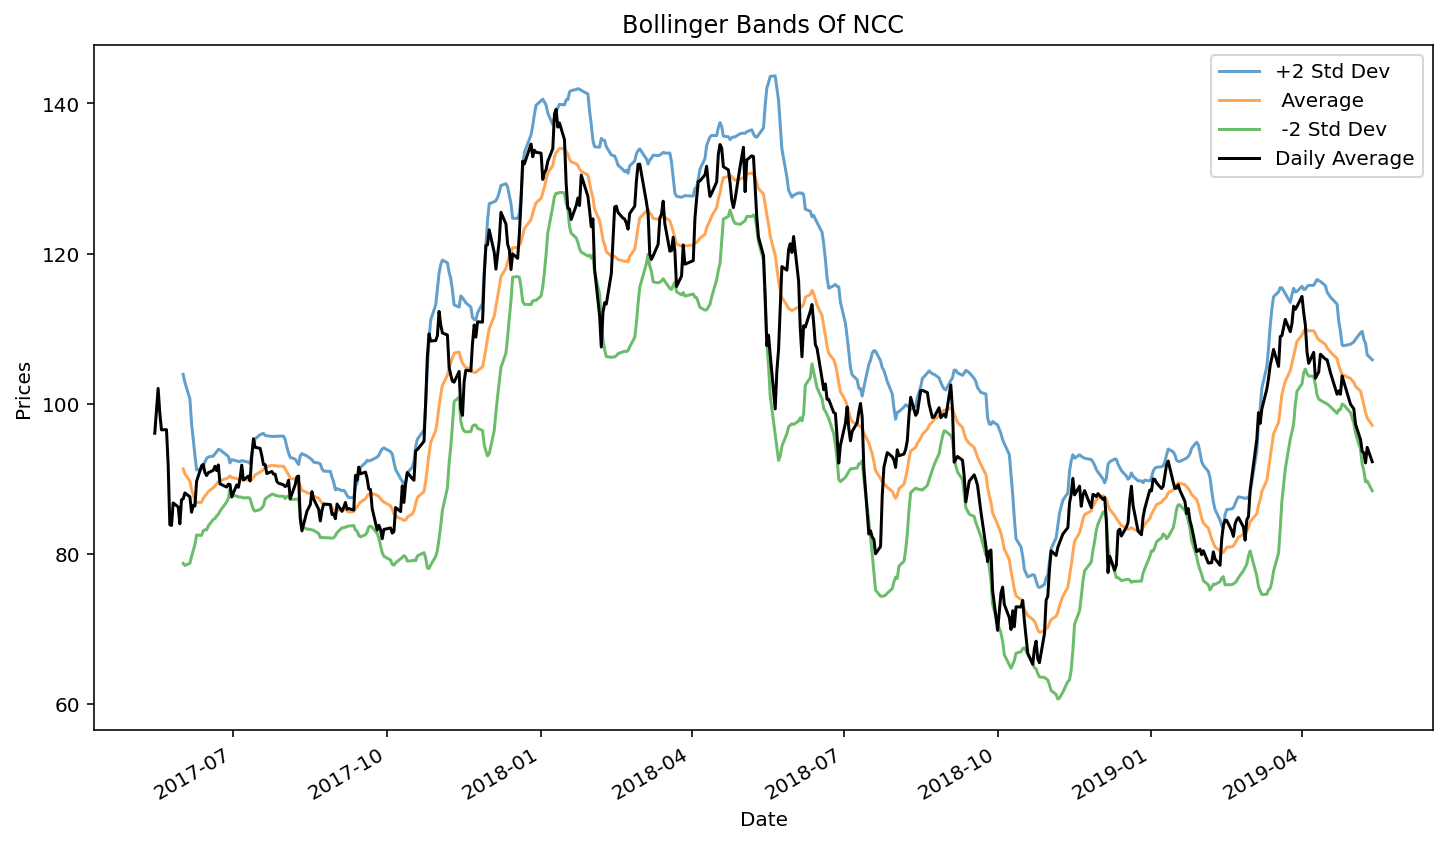

In [28]:
v = d4['Close Price'].rolling(14).mean()
vu = v + 2*d4['Close Price'].rolling(14).std()
vl = v - 2*d4['Close Price'].rolling(14).std()
plt.figure()
plt.title("Bollinger Bands Of NCC")
plt.ylabel("Prices")
vu.plot(label = "+2 Std Dev",alpha = 0.7)
v.plot(label = ' Average',alpha = 0.7)
vl.plot(label = " -2 Std Dev",alpha = 0.7)
d4['Average Price'].plot(label = "Daily Average",color = "black")
plt.legend()
plt.show()

In [29]:
v.dropna(inplace=True)
v

Date
2017-06-01     91.335714
2017-06-02     90.667857
2017-06-05     89.717857
2017-06-06     88.542857
2017-06-07     87.867857
                 ...    
2019-05-07    100.800000
2019-05-08     99.814286
2019-05-09     98.835714
2019-05-10     98.125000
2019-05-13     97.139286
Name: Close Price, Length: 481, dtype: float64

In [30]:
Nifty_df = pd.read_csv('Nifty50/Nifty50.csv')
NCC_df = pd.read_csv('Small_Cap/NCC.csv')

NCC_df = NCC_df[NCC_df.Series == 'EQ']

NCC_df['Date'] = NCC_df['Date'].astype('datetime64')
Nifty_df['Date'] = Nifty_df['Date'].astype('datetime64')

NCC_df.set_index('Date',inplace = True)
Nifty_df.set_index('Date',inplace = True)

NCC_df['Day_Precentage_Change'] = NCC_df['Close Price'].pct_change()
Nifty_df['Day_Precentage_Change'] = Nifty_df['Close'].pct_change()

NCC_df.dropna(inplace = True)
Nifty_df.dropna(inplace = True)

In [31]:
df=pd.concat([NCC_df.iloc[-90:,-1:],Nifty_df.iloc[-90:,-1:]],axis=1)
df.columns=['NCC','Nifty']
y=df['NCC']
X=df['Nifty']
x=sm.add_constant(X)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    NCC   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     12.21
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           0.000748
Time:                        14:28:11   Log-Likelihood:                 213.22
No. Observations:                  90   AIC:                            -422.4
Df Residuals:                      88   BIC:                            -417.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.002      0.144      0.8

In [32]:
import statsmodels.api as sm
df1=pd.concat([NCC_df['Close Price'].resample('M').mean(),Nifty_df['Close'].resample('M').mean()],axis=1)
df1.columns=['NCC','Nifty']
df1['NC']=df1['NCC'].pct_change()
df1['Nift']=df1['Nifty'].pct_change()
df1.dropna(inplace=True)
y=df1['NC']
X=df1['Nift']
x=sm.add_constant(X)
model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     NC   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     10.91
Date:                Mon, 08 Jun 2020   Prob (F-statistic):            0.00324
Time:                        14:28:11   Log-Likelihood:                 23.801
No. Observations:                  24   AIC:                            -43.60
Df Residuals:                      22   BIC:                            -41.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0121      0.020     -0.604      0.5

The value of beta for monthly return comes out to be 2.33, which is greater than one. therefore we can infer thhat NCC is very high volatile compared to Nifty on monthly basis.

A stock with a beta of:\
0 indicates their is no correlation between chosen benchmark and itself\
1 indicates a stock has the same volatility as the market\
more than 1 indicates a stock that’s more volatile than its benchmark\
less than 1 is less volatile than the benchmark\
less than 0 i.e negative beta indicates inverse relation

In [33]:
df = pd.read_csv('Small_Cap/NCC.csv')
df['Average']=df['Close Price'].rolling(14).mean()
df['+2 SD'] =df['Average']+ 2*df['Close Price'].rolling(14).std()
df['-2 SD'] = df['Average']-2*df['Close Price'].rolling(14).std()

df.dropna(inplace=True)
df.set_index('Date',inplace=True)
df.tail()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Average,+2 SD,-2 SD
Date,,,,,,,,,,,,,,,,,
07-May-2019,NCC,EQ,93.70,94.50,95.25,91.85,92.55,92.65,93.65,4876430,4.566790e+08,23543,891834,18.29,100.800000,109.649250,91.950750
08-May-2019,NCC,EQ,92.65,92.30,94.60,91.10,93.55,93.60,93.46,5454026,5.097505e+08,17813,774545,14.20,99.814286,108.570508,91.058063
09-May-2019,NCC,EQ,93.60,93.45,93.80,90.85,91.40,91.45,92.13,3484602,3.210419e+08,14649,557569,16.00,98.835714,108.072216,89.599212
10-May-2019,NCC,EQ,91.45,91.65,96.85,91.65,95.95,95.90,94.20,7923082,7.463868e+08,24007,1094615,13.82,98.125000,106.530378,89.719622
13-May-2019,NCC,EQ,95.90,95.95,95.95,89.15,90.05,90.10,92.29,6912840,6.379546e+08,21630,1891469,27.36,97.139286,105.858158,88.420413


In [34]:
df['Call']=np.nan
df['Call']=df['Call'].astype('str')
for i in range(len(df)):
    if df['Close Price'][i] < df['-2 SD'][i]:
        df['Call'][i] = 'Buy'
    elif df['Close Price'][i] > df['-2 SD'][i] and df['Close Price'][i] < df['Average'][i] :
        df['Call'][i] = 'Hold Buy/ Liquidate Short'
    elif df['Close Price'][i] < df['+2 SD'][i] and df['Close Price'][i] > df['Average'][i]:
        df['Call'][i] = 'Hold Short/ Liquidate Buy'
    elif df['Close Price'][i] > df['+2 SD'][i] :
        df['Call'][i] = 'Short'
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be s

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Average,+2 SD,-2 SD,Call
Date,,,,,,,,,,,,,,,,,,
01-Jun-2017,NCC,EQ,87.90,87.7,88.45,86.65,86.85,86.85,87.33,2406887,2.101937e+08,12120,696095,28.92,91.335714,103.922058,78.749371,Hold Buy/ Liquidate Short
02-Jun-2017,NCC,EQ,86.85,87.7,89.50,86.60,87.65,88.00,88.13,7742009,6.822983e+08,22081,3531831,45.62,90.667857,102.865751,78.469963,Hold Buy/ Liquidate Short
05-Jun-2017,NCC,EQ,88.00,88.1,88.35,86.80,87.05,87.10,87.62,2289444,2.005914e+08,16039,622945,27.21,89.717857,100.657454,78.778260,Hold Buy/ Liquidate Short
06-Jun-2017,NCC,EQ,87.10,86.9,87.50,84.15,85.10,85.00,85.56,3517344,3.009347e+08,15192,654428,18.61,88.542857,97.387313,79.698402,Hold Buy/ Liquidate Short
07-Jun-2017,NCC,EQ,85.00,85.1,88.80,84.80,87.00,87.55,86.49,6046788,5.229768e+08,21679,1997240,33.03,87.867857,95.254186,80.481528,Hold Buy/ Liquidate Short


In [35]:
x=df.iloc[:,[7,-2,-3,-4]]
y=df.iloc[:,-1]
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 5)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.metrics import confusion_matrix
def accuracy(cm):
    num = cm.trace()
    deno = cm.sum()
    return num/deno

In [36]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 5)
log.fit(X_train,y_train)

pred_log = log.predict(X_test)

cm_log = confusion_matrix(y_test,pred_log)
print("The accuracy of logistic model classifier is :" + str(accuracy(cm_log)))

The accuracy of logistic model classifier is :0.8144329896907216


In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train,y_train)

pred_KNN = KNN.predict(X_test)

cm_KNN = confusion_matrix(y_test,pred_KNN)
print("The accuracy of KNN model classifier is :" + str(accuracy(cm_KNN)))

The accuracy of KNN model classifier is :0.8247422680412371


In [38]:
from sklearn.svm import SVC
SVC = SVC(kernel='rbf', random_state = 5)
SVC.fit(X_train,y_train)

pred_SVC = SVC.predict(X_test)

cm_SVC = confusion_matrix(y_test,pred_SVC)
print("The accuracy of Kernel SVM model classifier is :" + str(accuracy(cm_SVC)))

The accuracy of Kernel SVM model classifier is :0.7525773195876289


In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

pred_DT = DT.predict(X_test)

cm_DT = confusion_matrix(y_test,pred_DT)
print("The accuracy of Decision Tree model classifier is :" + str(accuracy(cm_DT)))

The accuracy of Decision Tree model classifier is :0.6701030927835051


In [40]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

pred_RF = RF.predict(X_test)

cm_RF = confusion_matrix(y_test,pred_RF)
print("The accuracy of Random Forest model classifier is :" + str(accuracy(cm_RF)))

The accuracy of Random Forest model classifier is :0.7525773195876289


In [41]:
df1 = pd.read_csv("Small_Cap/FORTIS.csv")
df1 = df1[df1.Series == 'EQ']
df1['Average'] = df1['Close Price'].rolling(14).mean()
df1['+2 SD'] = df1['Average'] + 2*df1['Close Price'].rolling(14).std()
df1['-2 SD'] = df1['Average'] - 2*df1['Close Price'].rolling(14).std()
df1 = df1.dropna()
df1['Date'] = df1['Date'].astype('datetime64')
df1.set_index('Date',inplace = True)

X = df1.iloc[:,[7,-3,-2,-1]]
X

,Close Price,Average,+2 SD,-2 SD
Date,,,,
2017-06-01,198.35,199.871429,209.101539,190.641318
2017-06-02,192.95,198.992857,208.358166,189.627548
2017-06-05,194.90,198.064286,206.110253,190.018319
2017-06-06,191.05,197.003571,204.496077,189.511066
2017-06-07,194.05,196.803571,204.461394,189.145748
...,...,...,...,...
2019-05-07,135.20,138.810714,142.124596,135.496832
2019-05-08,133.60,138.442857,142.773225,134.112489
2019-05-09,133.00,137.864286,142.789016,132.939556


In [42]:
#Xt = sc.transform(X)
pred = log.predict(X)
pred= l.inverse_transform(pred)
print(pred)

['Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Short/ Liquidate Buy' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Short/ Liquidate Buy'
 'Hold Short/ Liquidate Buy' 'Hold Short/ Liquidate Buy' 'Buy' 'Buy'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Short/ Liquidate Buy'
 'Hold Short/ Liquidate Buy' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Buy/ Liquidate Short'
 'Hold Buy/ Liquidate Short' 'Hold Short/ Liquidate Buy'
 'Hold Short/ Liqui

In [43]:
df = pd.read_csv('Small_Cap/NCC.csv')
df=df[df['Series']=='EQ']
df['Date'].astype('datetime64')
df.set_index('Date',inplace=True)
df['perc_change_oc']= (df['Close Price'] - df['Open Price'])/df['Open Price'] *100
df['perc_change_lh'] = (df['High Price'] - df['Low Price'])/df['Low Price'] *100
df['pct_change'] = df['Close Price'].pct_change()*100
df['pct_change'][0] = 0.00
df['rolling Mean'] = df['pct_change'].rolling(5).mean()
df['rolling SD'] = df['pct_change'].rolling(5).std()
df = df.dropna()
df.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,perc_change_oc,perc_change_lh,pct_change,rolling Mean,rolling SD
Date,,,,,,,,,,,,,,,,,,,
07-May-2019,NCC,EQ,93.70,94.50,95.25,91.85,92.55,92.65,93.65,4876430,4.566790e+08,23543,891834,18.29,-1.957672,3.701688,-1.120598,-2.126484,1.327245
08-May-2019,NCC,EQ,92.65,92.30,94.60,91.10,93.55,93.60,93.46,5454026,5.097505e+08,17813,774545,14.20,1.408451,3.841932,1.025364,-1.146217,1.509565
09-May-2019,NCC,EQ,93.60,93.45,93.80,90.85,91.40,91.45,92.13,3484602,3.210419e+08,14649,557569,16.00,-2.140182,3.247111,-2.297009,-1.272958,1.588378
10-May-2019,NCC,EQ,91.45,91.65,96.85,91.65,95.95,95.90,94.20,7923082,7.463868e+08,24007,1094615,13.82,4.637207,5.673759,4.866047,-0.135730,3.205762
13-May-2019,NCC,EQ,95.90,95.95,95.95,89.15,90.05,90.10,92.29,6912840,6.379546e+08,21630,1891469,27.36,-6.096925,7.627594,-6.047967,-0.714832,4.039949


In [44]:
df['Action']=np.nan
for i in range(len(df)-1):
    if df['Close Price'][i+1]>=df['Close Price'][i]:
        df['Action'][i]=1
    elif df['Close Price'][i]>df['Close Price'][i+1]:
        df['Action'][i]=-1
df.dropna(inplace=True)
len(df)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


489

In [45]:
x=df.iloc[:,[-2,-3,-4,7,-1]].copy()
#x.dropna(inplace=True)
x.reset_index(inplace=True)
x.drop('Date',inplace=True,axis=1)
y=x['Action']
x.drop('Action',inplace=True,axis=1)
xt,xv,yt,yv=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
xt=s.fit_transform(xt)
xv=s.transform(xv)
cl = RandomForestClassifier(n_estimators = 50)
cl.fit(xt,yt)
y = cl.predict(xv)

cm = confusion_matrix(yv,y)
print("The accuracy of the model is :" + str(accuracy(cm)))

The accuracy of the model is :0.5306122448979592


In [46]:
y_=[]
for i in range(-1,-(len(y)),-1):
    y_.append((df['pct_change'][i])*y[i-1])
y_.append(0)
y_.reverse()
len(y_)

98

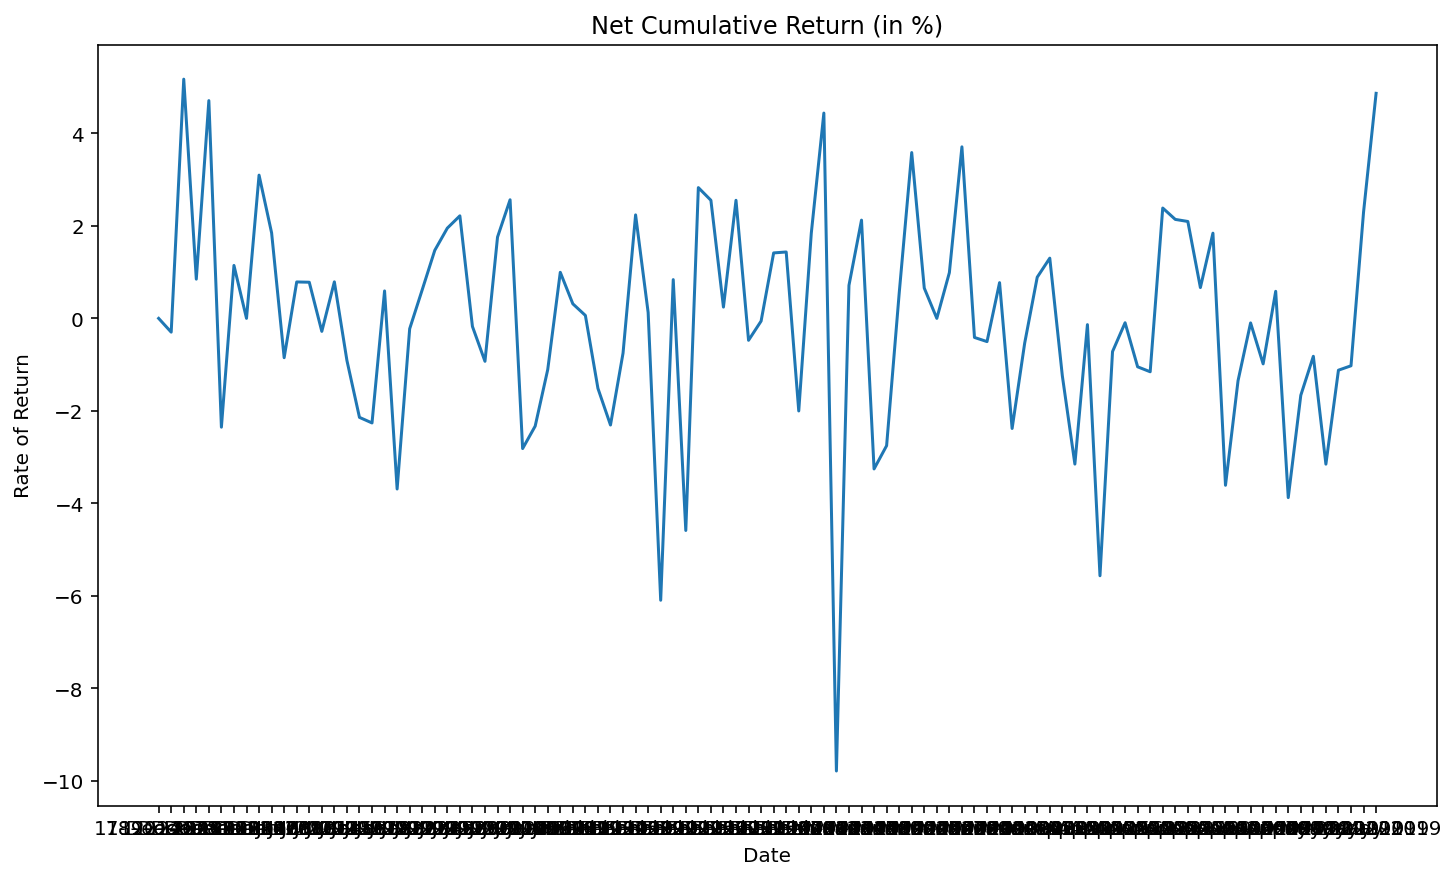

In [47]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(df.index[len(df) - len(y):],y_)
plt.title("Net Cumulative Return (in %)")
plt.xlabel("Date")
plt.ylabel("Rate of Return")
plt.show()

In [48]:
df1 = pd.read_csv('Small_Cap/JETAIRWAYS.csv')
df1['Date'] = df1['Date'].astype('datetime64')
df1 = df1[df1.Series == 'EQ']
df1.set_index('Date',inplace = True)
df1.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,JETAIRWAYS,EQ,519.45,520.00,533.40,517.10,527.8,527.50,526.08,1837033,9.664298e+08,25433,430754,23.45
2017-05-16,JETAIRWAYS,EQ,527.50,527.00,536.50,524.65,534.0,534.15,531.79,1382182,7.350363e+08,23991,284837,20.61
2017-05-17,JETAIRWAYS,EQ,534.15,532.00,534.75,526.20,530.0,528.90,529.75,690466,3.657742e+08,10219,53551,7.76
2017-05-18,JETAIRWAYS,EQ,528.90,525.15,538.60,517.50,517.7,522.70,529.55,1701102,9.008102e+08,25651,309608,18.20
2017-05-19,JETAIRWAYS,EQ,522.70,525.60,532.90,517.45,521.0,520.40,524.69,1272799,6.678247e+08,20409,257037,20.19


In [49]:
df1['pct_change']=df1['Close Price'].pct_change()*100
mean=df1['pct_change'].mean()
std=df1['pct_change'].std()
mean_annual=(round(mean*252,2))
std_annual= round(std*np.sqrt(252),2)
print("The annual return is: " + str(mean_annual))
print("The annual standard deviation is: " + str(std_annual))

The annual return is: -48.1
The annual standard deviation is: 62.49


In [50]:
df2 = pd.read_csv('Mid_Cap/PNB.csv')
df2['Date'] = df2['Date'].astype('datetime64')
df2= df2[df2.Series == 'EQ']
df2.set_index('Date',inplace = True)
df2.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,PNB,EQ,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
2017-05-16,PNB,EQ,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2017-05-17,PNB,EQ,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
2017-05-18,PNB,EQ,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
2017-05-19,PNB,EQ,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [51]:
df2['pct_change']=df2['Close Price'].pct_change()*100
mean=df2['pct_change'].mean()
std=df2['pct_change'].std()
mean_annual=(round(mean*252,2))
std_annual= round(std*np.sqrt(252),2)
print("The annual return is: " + str(mean_annual))
print("The annual standard deviation is: " + str(std_annual))

The annual return is: -23.94
The annual standard deviation is: 54.54


In [52]:
df3 = pd.read_csv('Mid_Cap/SUNTV.csv')
df2['Date'] = df3['Date'].astype('datetime64')
df3 = df3[df3.Series == 'EQ']
df3.set_index('Date',inplace = True)
df3.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
15-May-2017,SUNTV,EQ,883.70,885.5,928.00,885.4,911.25,912.20,917.04,2193488,2.011506e+09,40593,179590,8.19
16-May-2017,SUNTV,EQ,912.20,908.2,909.00,890.2,894.00,894.70,897.29,1110184,9.961583e+08,22027,220445,19.86
17-May-2017,SUNTV,EQ,894.70,894.9,899.15,880.5,889.00,887.05,887.49,500545,4.442296e+08,15709,101722,20.32
18-May-2017,SUNTV,EQ,887.05,888.0,917.90,865.2,866.15,871.35,902.17,2436703,2.198309e+09,47159,481973,19.78
19-May-2017,SUNTV,EQ,871.35,877.0,895.10,813.5,850.60,852.40,842.98,4223048,3.559926e+09,85921,305269,7.23


In [53]:
df3['pct_change']=df3['Close Price'].pct_change()*100
mean=df3['pct_change'].mean()
std=df3['pct_change'].std()
mean_annual=(round(mean*252,2))
std_annual= round(std*np.sqrt(252),2)
print("The annual return is: " + str(mean_annual))
print("The annual standard deviation is: " + str(std_annual))

The annual return is: -20.57
The annual standard deviation is: 36.54


In [54]:
df4 = pd.read_csv('Large_Cap/HDFC.csv')
df4['Date'] = df4['Date'].astype('datetime64')
df4 = df4[df4.Series == 'EQ']
df4.set_index('Date',inplace = True)
df4.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,HDFC,EQ,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25
2017-05-16,HDFC,EQ,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13
2017-05-17,HDFC,EQ,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02
2017-05-18,HDFC,EQ,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44
2017-05-19,HDFC,EQ,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74


In [55]:
df4['pct_change']=df4['Close Price'].pct_change()*100
mean=df4['pct_change'].mean()
std=df4['pct_change'].std()
mean_annual=(round(mean*252,2))
std_annual= round(std*np.sqrt(252),2)
print("The annual return is: " + str(mean_annual))
print("The annual standard deviation is: " + str(std_annual))

The annual return is: 13.79
The annual standard deviation is: 21.46


In [56]:
df5 = pd.read_csv('Large_Cap/TITAN.csv')
df5['Date'] = df5['Date'].astype('datetime64')
df5 = df5[df5.Series == 'EQ']
df5.set_index('Date',inplace = True)
df5.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,TITAN,EQ,495.00,489.65,490.0,472.40,486.00,483.65,479.93,3897357,1.870465e+09,52478,1722661,44.20
2017-05-16,TITAN,EQ,483.65,486.00,491.0,480.80,490.00,488.30,487.32,1308863,6.378316e+08,33942,563667,43.07
2017-05-17,TITAN,EQ,488.30,490.00,490.1,477.30,481.00,481.75,482.25,859054,4.142814e+08,26686,448314,52.19
2017-05-18,TITAN,EQ,481.75,479.00,482.6,470.05,470.85,471.65,474.78,811219,3.851526e+08,24621,438716,54.08
2017-05-19,TITAN,EQ,471.65,475.00,479.5,460.35,469.65,471.15,469.05,1022479,4.795891e+08,27225,263561,25.78


In [57]:
df5['pct_change']=df5['Close Price'].pct_change()*100

mean=df5['pct_change'].mean()
std=df5['pct_change'].std()
mean_annual=(round(mean*252,2))
std_annual= round(std*np.sqrt(252),2)
print("The annual return is: " + str(mean_annual))
print("The annual standard deviation is: " + str(std_annual))

The annual return is: 49.16
The annual standard deviation is: 32.48


In [58]:
pf=pd.concat([df1['pct_change'],df2['pct_change'],df3['pct_change'],df4['pct_change'],df5['pct_change']],axis=1)
pf.dropna(inplace=True)
pf.columns=['Jetairways','PNB','SUNTV','HDFC','TITAN']
pf.head()

,Jetairways,PNB,SUNTV,HDFC,TITAN
Date,,,,,
2017-05-16,1.260664,4.406475,-1.918439,0.452068,0.961439
2017-05-17,-0.982870,-5.225380,-0.855035,-0.896875,-1.341388
2017-05-18,-1.172244,-3.968494,-1.769912,-0.995169,-2.096523
2017-05-19,-0.440023,-2.082019,-2.174786,-1.070232,-0.106011
2017-05-22,-8.599154,-2.738402,-0.885734,-0.049323,2.175528


In [59]:
np.random.seed(42)

n = len(pf.index)

weights = np.zeros((n, len(pf.columns)))

ret = np.zeros(n)
vol = np.zeros(n)

sharpe = np.zeros(n)

for x in range(n):
    w = np.array(np.random.random(5))
    w = w/np.sum(w)
    
    weights[x,:] = w
    
    ret[x] = np.sum( (pf.mean() * w * 252))
    
    vol[x] = np.sqrt(np.dot(w.T, np.dot(pf.cov()*252, w)))
    
    sharpe[x] = ret[x]/vol[x]

In [60]:
max_shr_ratio = sharpe.argmax()
max_shr_ratio
min_vol = vol.argmin()
min_vol

339

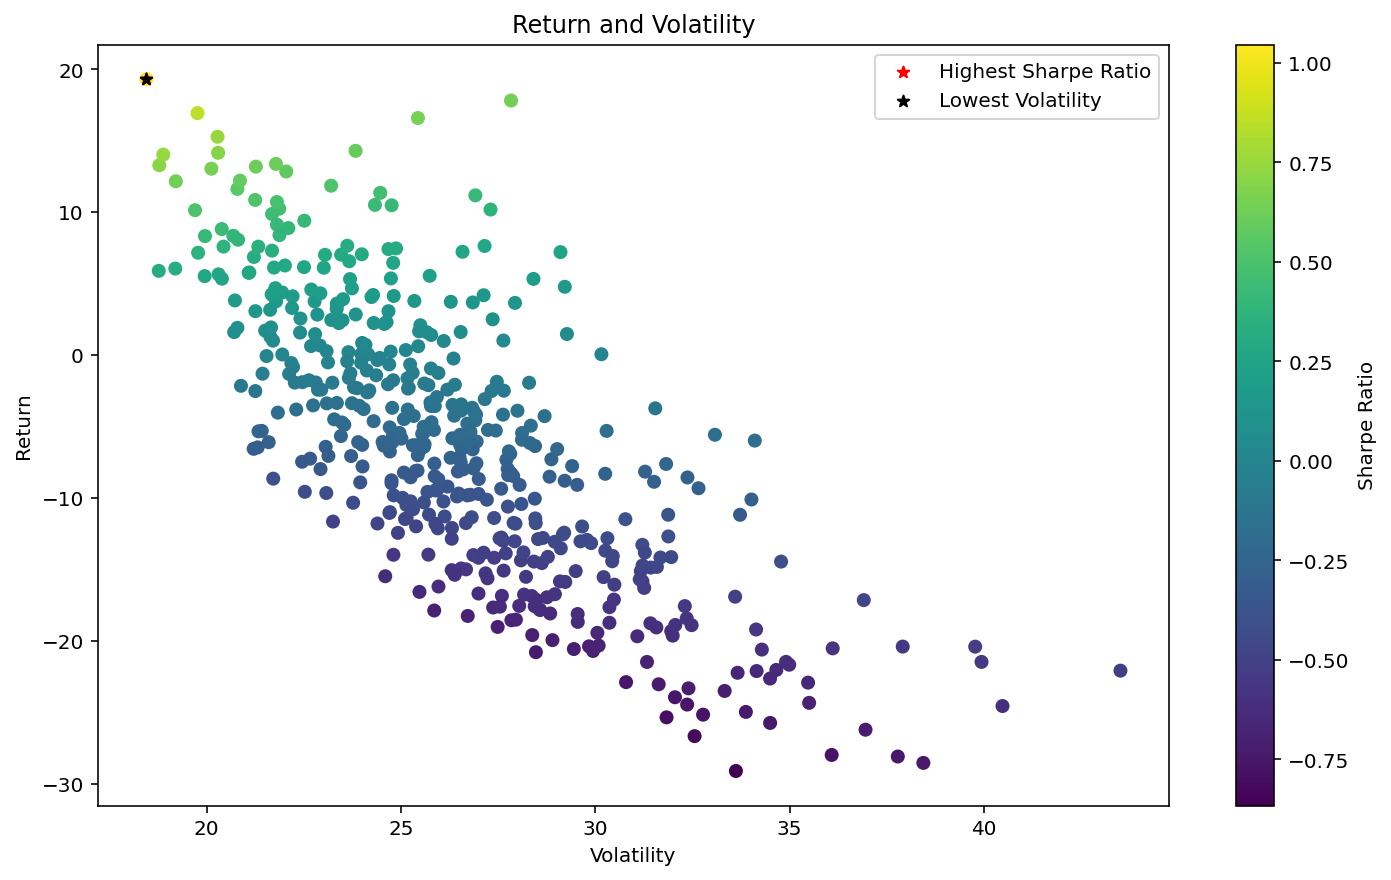

In [61]:
plt.figure()
plt.title("Return and Volatility")
plt.scatter(vol, ret, c=sharpe, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol[max_shr_ratio],ret[max_shr_ratio],marker = '*',c = 'red',label = 'Highest Sharpe Ratio')
plt.scatter(vol[min_vol],ret[min_vol],marker = '*',c = 'black',label = 'Lowest Volatility')
plt.legend()
plt.show()

In [62]:
df = pd.read_csv('Small_Cap/ASHOKA.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data = pd.DataFrame(df['Close Price'],df.index)
df_data.columns = ['Ashoka']
df = pd.read_csv('Small_Cap/BAJAJELEC.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Bajaj Elec']  = df['Close Price']
df = pd.read_csv('Small_Cap/BOMDYEING.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Bombay Dyeing']  = df['Close Price']
df = pd.read_csv('Small_Cap/FORTIS.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Fortis']  = df['Close Price']
df = pd.read_csv('Small_Cap/ITDC.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['IDTC']  = df['Close Price']
df = pd.read_csv('Small_Cap/PVR.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['PVR']  = df['Close Price']
df = pd.read_csv('Small_Cap/RAYMOND.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Raymond']  = df['Close Price']
df = pd.read_csv('Small_Cap/RCOM.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Rcom']  = df['Close Price']
df = pd.read_csv('Small_Cap/VENKEYS.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Venkeys']  = df['Close Price']


In [63]:
df = pd.read_csv('Mid_Cap/ADANIPOWER.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Adani Power']  = df['Close Price']
df = pd.read_csv('Mid_Cap/APOLLOTYRE.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Apollo Tyre']  = df['Close Price']
df = pd.read_csv('Mid_Cap/DHFL.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['DHFL']  = df['Close Price']
df = pd.read_csv('Mid_Cap/GODREJIND.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Godrej Ind']  = df['Close Price']
df = pd.read_csv('Mid_Cap/JINDALSTEL.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Jindal Steel']  = df['Close Price']
df = pd.read_csv('Mid_Cap/MINDTREE.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Mind Tree']  = df['Close Price']
df = pd.read_csv('Mid_Cap/MUTHOOTFIN.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Muthoot Fin']  = df['Close Price']
df = pd.read_csv('Mid_Cap/RELINFRA.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Rel Infra']  = df['Close Price']
df = pd.read_csv('Mid_Cap/TATACHEM.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Tata Chem']  = df['Close Price']
df = pd.read_csv('Mid_Cap/TATAPOWER.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Tata Power']  = df['Close Price']


In [64]:
df = pd.read_csv('Large_Cap/ADANIPORTS.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Adani Ports']  = df['Close Price']
df = pd.read_csv('Large_Cap/ASIANPAINT.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Asian Paint']  = df['Close Price']
df = pd.read_csv('Large_Cap/GAIL.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Gail']  = df['Close Price']
df = pd.read_csv('Large_Cap/HINDALCO.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Hindalco']  = df['Close Price']
df = pd.read_csv('Large_Cap/HINDUNILVR.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Hind Unilvr']  = df['Close Price']
df = pd.read_csv('Large_Cap/ITC.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['ITC']  = df['Close Price']
df = pd.read_csv('Large_Cap/LT.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['LT']  = df['Close Price']
df = pd.read_csv('Large_Cap/RELIANCE.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Reliance']  = df['Close Price']
df = pd.read_csv('Large_Cap/RELIANCE.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Reliance']  = df['Close Price']
df = pd.read_csv('Large_Cap/TITAN.csv')
df['Date'] = df['Date'].astype('datetime64')
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df_data['Titan']  = df['Close Price']

In [65]:
df_data.head()

,Ashoka,Bajaj Elec,Bombay Dyeing,Fortis,IDTC,PVR,Raymond,Rcom,Venkeys,Adani Power,...,Tata Power,Adani Ports,Asian Paint,Gail,Hindalco,Hind Unilvr,ITC,LT,Reliance,Titan
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,216.05,341.15,82.20,205.25,650.15,1524.95,772.80,32.00,1169.70,30.25,...,83.55,356.20,1148.05,414.00,198.45,983.25,277.95,1742.40,1344.10,483.65
2017-05-16,214.90,347.00,83.40,207.90,636.70,1539.00,785.00,32.10,1177.00,32.85,...,83.85,354.50,1142.85,411.40,196.50,1000.40,283.45,1740.70,1356.30,488.30
2017-05-17,217.00,349.85,82.25,205.90,626.75,1530.30,783.65,31.95,1188.00,33.10,...,85.35,348.55,1154.95,408.30,198.85,1009.40,281.65,1755.45,1353.10,481.75
2017-05-18,209.65,334.10,78.95,196.85,604.65,1515.05,746.95,31.05,1156.90,31.90,...,83.75,347.90,1151.35,404.75,194.00,990.25,277.90,1722.60,1327.35,471.65
2017-05-19,206.25,336.20,77.15,203.55,594.30,1513.55,723.10,30.55,1161.65,32.40,...,84.15,349.45,1123.15,401.05,191.00,1008.00,286.20,1724.55,1318.85,471.15


In [66]:
import numpy as np
df_data = df_data.pct_change()*100
mean = df_data.mean(axis=0)
std = df_data.std(axis=0)
annual_mean_return = round(mean*252,2)
annual_std = round(std*np.sqrt(252),2)

In [67]:
data = pd.DataFrame({'Mean' : annual_mean_return,
                    'Std Deviation' :annual_std})

data.reset_index(inplace =True)
data = data.rename(columns ={'index':'Stock'})
data.head()

,Stock,Mean,Std Deviation
0,Ashoka,-20.85,44.30
1,Bajaj Elec,31.61,40.24
2,Bombay Dyeing,43.16,68.17
3,Fortis,-14.60,42.13
4,IDTC,-36.94,52.78


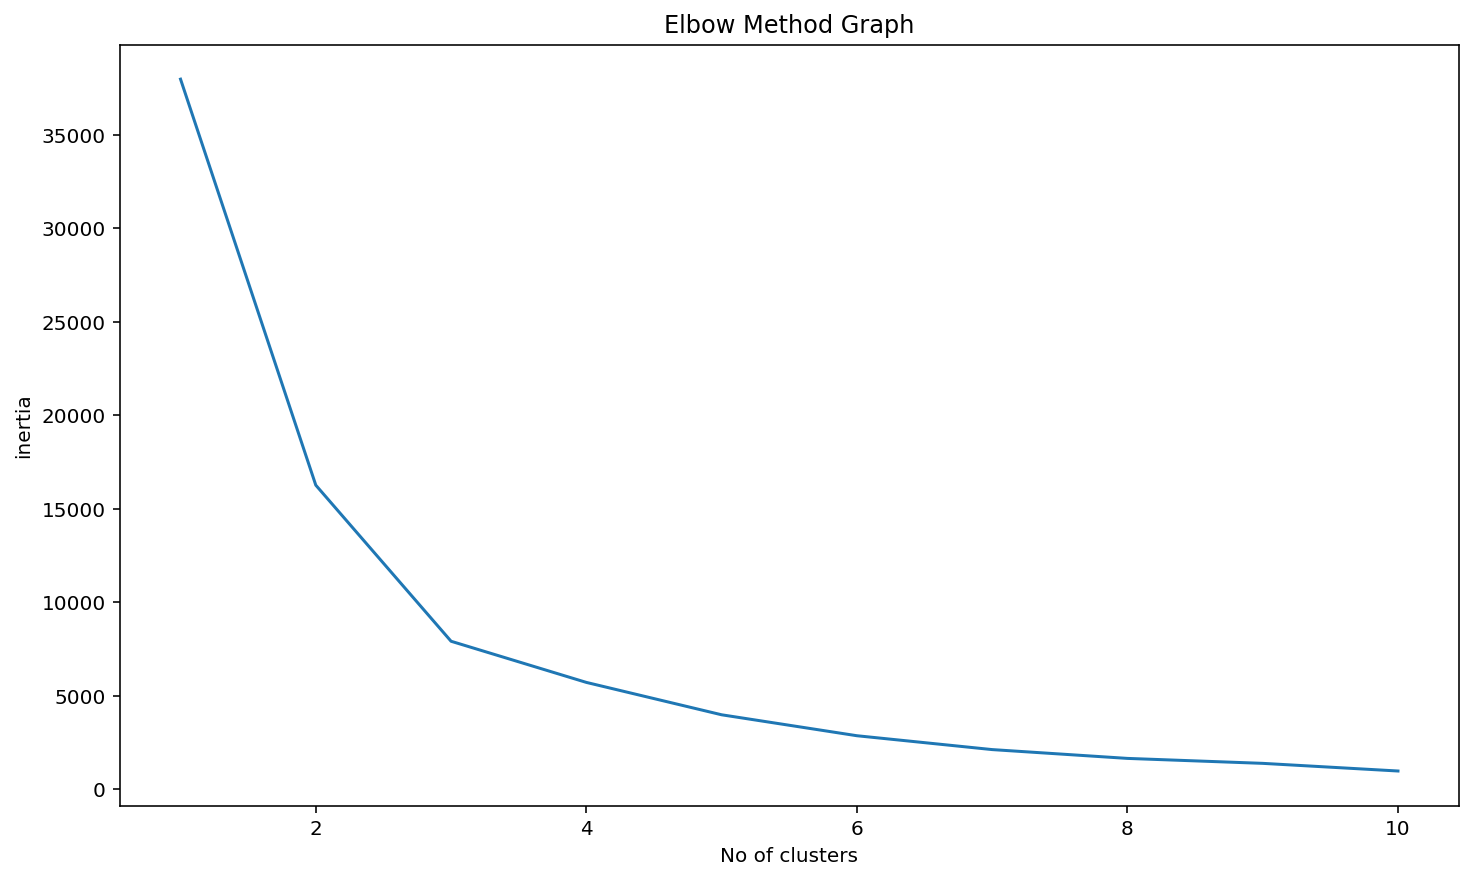

In [68]:
import matplotlib.pyplot as plt
x = data.iloc[:,1:]
y = data.iloc[:,0]
from sklearn.cluster import KMeans
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)
plt.figure()
plt.plot(range(1,11),inertia)
plt.title("Elbow Method Graph")
plt.xlabel("No of clusters")
plt.ylabel("inertia")
plt.show()

In [69]:
print("From the plot itis clear that the optimum number of clusters is 3")

From the plot itis clear that the optimum number of clusters is 3


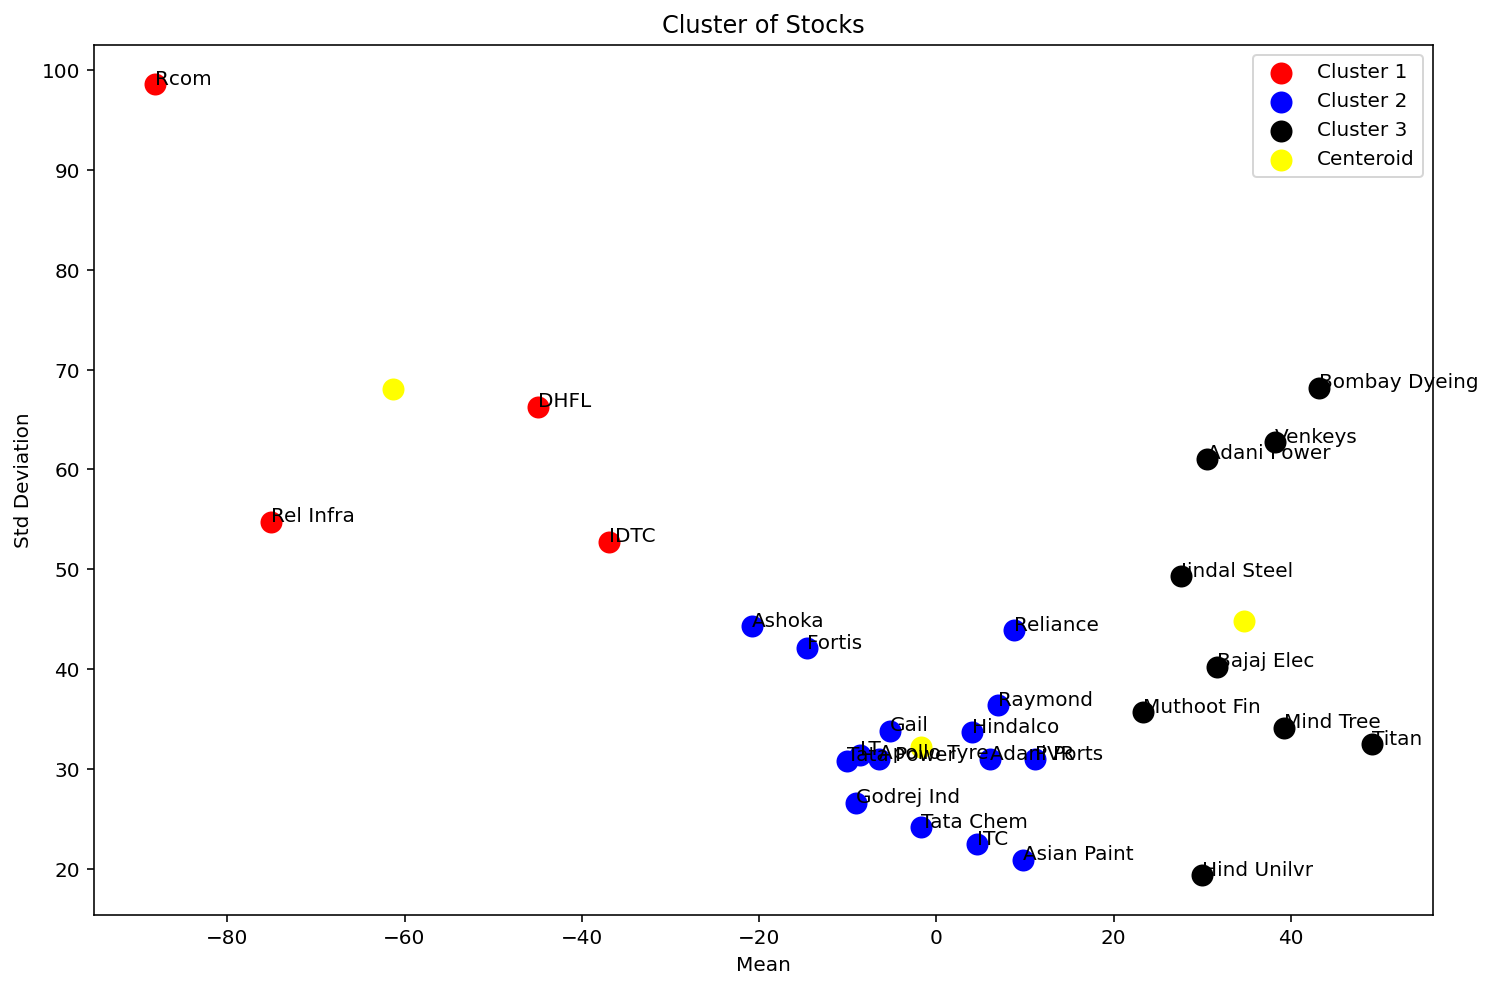

In [70]:
kmeans = KMeans(n_clusters = 3,init='k-means++',max_iter=300,
                    n_init = 10,random_state=0)
y_pred = kmeans.fit_predict(x)
plt.figure(figsize = (12,8))
plt.scatter(x[y_pred==0]['Mean'],x[y_pred==0]['Std Deviation'],s = 100
            ,c = 'red',label = 'Cluster 1')

plt.scatter(x[y_pred==1]['Mean'],x[y_pred==1]['Std Deviation'],s = 100
            ,c = 'blue',label = 'Cluster 2')


plt.scatter(x[y_pred==2]['Mean'],x[y_pred==2]['Std Deviation'],s = 100
            ,c = 'black',label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            s = 100,c = 'yellow',label = "Centeroid")


for i, txt in enumerate(y):
    plt.annotate(txt, (x.loc[i]['Mean'], x.loc[i]['Std Deviation']))

plt.title("Cluster of Stocks")
plt.xlabel("Mean")
plt.ylabel("Std Deviation")
plt.legend()

plt.show()


In [71]:
cluster_1 = y[y_pred==0]
cluster_1 = list(cluster_1)
cluster_2 = y[y_pred==1]
cluster_2 = list(cluster_2)
cluster_3 = y[y_pred==2]
cluster_3 = list(cluster_3)
cluster = pd.DataFrame({"Cluster 1" : 'No',"Cluster 2" : 'No',"Cluster 3" : 'No'},data['Stock'])
for i in range(len(y)):
    if y[i] in cluster_1:
        cluster['Cluster 1'][i] = 'Yes'
    if y[i] in cluster_2:
        cluster['Cluster 2'][i] = 'Yes'
    if y[i] in cluster_3:
        cluster['Cluster 3'][i] = 'Yes'
cluster

,Cluster 1,Cluster 2,Cluster 3
Stock,,,
Ashoka,No,Yes,No
Bajaj Elec,No,No,Yes
Bombay Dyeing,No,No,Yes
Fortis,No,Yes,No
IDTC,Yes,No,No
PVR,No,Yes,No
Raymond,No,Yes,No
Rcom,Yes,No,No
Venkeys,No,No,Yes
